**Алексей, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 


# Яндекс Недвижимость

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> В начале работы всегда очень важно писать цель, а также важные пункты, на которые стоит обращать внимание.

## Шаг 1. Посмотрим на данные, изучим общую информацию

In [1]:
import pandas as pd
import re
import random
import math
import numpy as np
# from IPython.core.display_functions import display

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
# from api_key import api_key
import json
from geopy import distance

<div class="alert alert-info" role="alert">
    <p class="mb-0">В коде использую <code>display()</code>, потомучто это однозначно даёт понять что планируется вывод / печать результатов. То есть использую <code>display()</code> намеренно, хотя понимаю что можно и без него выводить данные. 👌</p>
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Принято)

In [3]:
pd.__version__

'1.3.4'

In [4]:
# set max columns to none
pd.set_option("display.max_columns", None)

In [5]:
#  api key for Yandex.Maps 1_000 requests per day
api_key = '3d3d28e1-3201-4972-a5c6-9683ae982984'

pulkovo_long_lat = (30.270441, 59.799816)
hares_island_long_lat = (30.321948, 59.951103)

Если тип локации не указан, считаем что это город.

Функция разделяет название населённого пункта на имя и тип. Предпологается, что имя с большой буквы…

In [6]:
def name_n_type(text):
        whole_words = text.split()
        type_list = []
        name_list = []
        name_loc = " "
        type_loc = " "
        
        # regex
        pattern = '[А-ЯЁ]+[а-яё]'
        
        for word in whole_words:
            
            # searching pattern
            if re.search(pattern, word):
                name_list.append(word)
            else:
                type_list.append(word)
        
        name_loc = name_loc.join(name_list)
        
        if len(type_list) == 0:
            type_loc = 'город'
        else:
            type_loc = type_loc.join(type_list)
        
        return name_loc, type_loc


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Отличная функция! Это разделение поможет нам четче найти неявные дубли

In [7]:
def correct_name(to_correct):
    if 'поселок' in to_correct:
        to_correct = to_correct.replace('поселок', 'посёлок')
    return to_correct


In [8]:
def get_length_2_arprt(
        locality_name,
        locality_type,
        region='ленинградская область'):

    address = (region, locality_type, locality_name)
    address = ', '.join(address)
    maps_url = 'https://geocode-maps.yandex.ru/1.x/'
    keys = {'apikey': api_key,
            'geocode': address,
            'format': 'json',
            'results': '1',
            }

    row_data = requests.get(maps_url, params=keys)
    parsed = json.loads(row_data.text)
    locality_position = (json.dumps(
        parsed['response']['GeoObjectCollection']
        ['featureMember'][0]['GeoObject']['Point']['pos']
        , indent=4, ensure_ascii=False
    )
    )
    locality_position = locality_position.replace('\"', '')
    long, lat = locality_position.split(' ')
    locality_long_lat = (float(long), float(lat))
    dist_in_m = distance.distance(
        locality_long_lat,
        pulkovo_long_lat
    ).m
    return (float(round(dist_in_m)))


In [ ]:
def to_hares_island(
        locality_name,
        locality_type,
        region='ленинградская область'):

    address = (region, locality_type, locality_name)
    address = ', '.join(address)
    maps_url = 'https://geocode-maps.yandex.ru/1.x/'
    keys = {'apikey': api_key,
            'geocode': address,
            'format': 'json',
            'results': '1',
            }

    row_data = requests.get(maps_url, params=keys)
    parsed = json.loads(row_data.text)
    locality_position = (json.dumps(
        parsed['response']['GeoObjectCollection']
        ['featureMember'][0]['GeoObject']['Point']['pos']
        , indent=4, ensure_ascii=False
    )
    )
    locality_position = locality_position.replace('\"', '')
    long, lat = locality_position.split(' ')
    locality_long_lat = (float(long), float(lat))
    dist_in_m = distance.distance(
        locality_long_lat,
        hares_island_long_lat
    ).m
    return (float(round(dist_in_m)))


In [ ]:
def type_of_floor(floors):
    if floors['floor'] == 1:
        return 'first'
    elif floors['floor'] == floors['floors_total']:
        return 'last'
    else:
        return 'other'


In [9]:
real_estate_data = pd.read_csv('./datasets/real_estate_data.csv', sep='\t')

In [10]:
display(real_estate_data['balcony'].unique())

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [11]:
display(real_estate_data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


`'cityCenters_nearest'` → convert to snake case

In [12]:
real_estate_data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Молодец, что приводишь названия колонок к единому стилю 

In [13]:
display(real_estate_data['is_apartment'].unique())

array([nan, False, True], dtype=object)

In [14]:
display(real_estate_data['balcony'].unique())

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

<div class="alert alert-info" role="alert">
    <p class="mb-0">Как получить <code>list</code> колонок с <code>NaN</code> нашёл на <code>stackoverflow</code> 👌</p>
</div>

In [15]:
display(
    real_estate_data.columns[real_estate_data.isna().any()].tolist()
)

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Добро, вот с этими колонками нужно разобраться в них пропуски — `NaN`

In [16]:
display(real_estate_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

In [17]:

for column in real_estate_data.columns:
    count_of_nan = len(real_estate_data.loc[real_estate_data[column].isna()][column])
    if count_of_nan > 0:
        print(column, end=' NaN = ')
        print(count_of_nan)
        print(real_estate_data[column].describe(), end='\n\n')

ceiling_height NaN = 9195
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

floors_total NaN = 86
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

living_area NaN = 1903
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

is_apartment NaN = 20924
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

kitchen_area NaN = 2278
count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Увидели, с чем предстоит иметь дело

## Шаг 2. Предобработка данных

### Определяем и изучаем пропущенные значения:

In [18]:
display(
    real_estate_data.columns[real_estate_data.isna().any()].tolist()
)

['ceiling_height',
 'floors_total',
 'living_area',
 'is_apartment',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

    ❌ 'ceiling_height' NaN = 9195
    ❌ 'floors_total' NaN = 86
    ❌ 'living_area' NaN = 1903
    ❌ 'is_apartment' NaN = 20924
    ❌ 'kitchen_area' NaN = 2278
    ❌ 'balcony' NaN = 11519
    ❌ 'locality_name' NaN = 49
    ❌ 'airports_nearest' NaN = 5542
    ❌ 'city_centers_nearest' NaN = 5519
    ❌ 'parks_around3000' NaN = 5518
    ❌ 'parks_nearest' NaN = 15620
    ❌ 'ponds_around3000' NaN = 5518
    ❌ 'ponds_nearest' NaN = 14589
    ❌ 'days_exposition' NaN = 3181

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Я бы советовала сразу выводить долю пропусков. Так мы увидим, что можно отбросить, а с чем надо работать

<div class="alert alert-info"> <b>Комментарий студента:</b> done</div>

#### `is_apartment` NaN ❌

Скорее всего в `'is_apartment'` `NaN` там, где не отмечено `True`. То есть `NaN` — это просто `False`

In [19]:
real_estate_data['is_apartment'].fillna(value=False, inplace=True)

#### `floor` NaN ❌

Проверим как связаны этаж и наличие балкона. Скорее всего, на первом этаже нет балкона.

In [20]:
display(
    real_estate_data['floor'].loc[
        (real_estate_data['balcony'].isna())
    ].describe()
)

display(
    real_estate_data['floor'].loc[
        ~(real_estate_data['balcony'].isna())
    ].describe()
)

display(
    real_estate_data['floor'].loc[
        (real_estate_data['balcony'].isna())
        & (real_estate_data['floor'] == 1)
    ].count()
)

count    11519.000000
mean         5.314003
std          4.667232
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         31.000000
Name: floor, dtype: float64

count    12180.000000
mean         6.439327
std          5.022114
min          1.000000
25%          3.000000
50%          5.000000
75%          9.000000
max         33.000000
Name: floor, dtype: float64

1926

✔️ `'floor'`

<hr>

#### `balcony` NaN ❌

In [21]:
(
    real_estate_data['balcony'].loc[
        (real_estate_data['balcony'].isna())
        & (real_estate_data['floor'] == 1)
    ].fillna(value=0, inplace=True)
)

In [22]:
display(
    real_estate_data['balcony'].unique()
)

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Временно заменим `NaN`в `balcony` на 108.

In [23]:
real_estate_data['balcony'].fillna(value=108, inplace=True)

In [24]:
display(
    real_estate_data['balcony'].unique()
)

array([108.,   2.,   0.,   1.,   5.,   4.,   3.])

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Я бы советовала заменить проупски на 0. Скорее всего балконов просто нет

<div class="alert alert-info"> <b>Комментарий студента:</b> да, сделал замену ниже по коду.</div>

[здесь сделал замену](#balcony_finish)

<hr>

#### `is_apartment` NaN ❌

Скорее всего в `'is_apartment'` `NaN` там, где не отмечено `True`. То есть `NaN` — это просто `False`

In [25]:
real_estate_data['is_apartment'].fillna(value=False, inplace=True)

✔️ `'is_apartment'`

<hr>

#### `locality_name` NaN ❌

In [26]:
display(
    real_estate_data.loc[real_estate_data['locality_name'].isna()]
                        .head(10)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,False,False,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,False,False,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,False,False,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,False,False,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,False,False,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,False,False,False,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,False,False,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


**Предполагаю:**

что стоит заменить пропущенные высоту потолков и количество этажей на медиану районных значений.

##### `'locality_name'` — сначала удалим неявные дубликаты

In [27]:
real_estate_data['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

Заменим `NaN` в `'locality_name'` → на `'Санкт-Петербург'`.

Пропусков всего 49 и `'Санкт-Петербург'` самое популярное значение. 

In [28]:
real_estate_data['locality_name'].fillna('Санкт-Петербург', inplace=True)

Функция `correct_name` меняет `'поселок'` на `'посёлок'`.

In [29]:
print('уникальных названий всего:')
print('используются поселок и посёлок:', len(real_estate_data['locality_name'].unique()))
real_estate_data['locality_name'] = real_estate_data['locality_name'].apply(correct_name)
print('используется только посёлок:', len(real_estate_data['locality_name'].unique()))

уникальных названий всего:
используются поселок и посёлок: 364
используется только посёлок: 330


type of location:
'деревня'
'садовое товарищество'
'городской посёлок'
'посёлок городского типа'
'коттеджный посёлок'
'посёлок при железнодорожной станции'
'посёлок станции'
'посёлок'
'село'
'садоводческое некоммерческое товарищество'

##### Добавим столбец с типом населённого пункта

Функция `name_n_type` делит название `'locality_name'` на **название** и **тип** населённого пункта.

In [30]:
real_estate_data['locality_name'], real_estate_data['locality_type'] = (
    zip(*real_estate_data['locality_name']
    .apply(name_n_type))
)

In [31]:
display(
    real_estate_data.head()
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,108.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,посёлок
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,108.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город


In [32]:
display(
    real_estate_data['locality_type'].unique()
)

array(['город', 'посёлок', 'городской посёлок', 'деревня',
       'посёлок городского типа', 'садовое товарищество', 'село',
       'посёлок городского типа имени', 'посёлок станции',
       'садоводческое некоммерческое товарищество',
       'посёлок 69-й километр', 'посёлок при железнодорожной станции',
       'коттеджный посёлок'], dtype=object)

In [33]:
real_estate_data.loc[real_estate_data['locality_name'] == 'посёлок 69-й километр', 'locality_name'] = '69-й километр'
real_estate_data.loc[real_estate_data['locality_type'] == 'посёлок 69-й километр', 'locality_type'] = 'посёлок'

In [34]:
display(
    real_estate_data['locality_type'].unique()
)

array(['город', 'посёлок', 'городской посёлок', 'деревня',
       'посёлок городского типа', 'садовое товарищество', 'село',
       'посёлок городского типа имени', 'посёлок станции',
       'садоводческое некоммерческое товарищество',
       'посёлок при железнодорожной станции', 'коттеджный посёлок'],
      dtype=object)

Сделаем справочник по типам населённых пунктов.

In [35]:
locality_type_series = pd.Series(real_estate_data['locality_type'].unique())
display(
    locality_type_series
)

0                                         город
1                                       посёлок
2                             городской посёлок
3                                       деревня
4                       посёлок городского типа
5                          садовое товарищество
6                                          село
7                 посёлок городского типа имени
8                               посёлок станции
9     садоводческое некоммерческое товарищество
10          посёлок при железнодорожной станции
11                           коттеджный посёлок
dtype: object

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Молодец, что провел качественную работу по обработке неявных дублей! В целом, можно было просто заменить ё на е. Или пойти дальше: проверить дублирующие локации на предмет того, являются ли они одним целым (к примеру, Мурино и деревня Мурино). Если да, можно полностью отбросить конкретизацию локаций

<hr>

Переведём строковый тип населённого пункта `'locality_type'` в числовой.

In [36]:
real_estate_data['locality_type'] = (
    real_estate_data['locality_type'].apply(lambda x: 
        list(locality_type_series[locality_type_series == x].index)[0]
    )
)

In [37]:
display(
    real_estate_data.head()
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,108.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,108.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0


In [38]:
real_estate_data = real_estate_data.astype(
    {
        'locality_name': 'category',
        'locality_type': 'category',
    }
)

Жаль что нет параметра `inplace` у функции `astype()`

In [39]:
display(
    real_estate_data['balcony'].unique()
)

array([108.,   2.,   0.,   1.,   5.,   4.,   3.])

In [40]:
display(
    real_estate_data.groupby(by=['locality_type'])['balcony'].median()
)

locality_type
0       5.0
1       2.0
2     108.0
3       2.0
4       4.5
5      54.5
6     108.0
7       2.0
8     108.0
9     108.0
10    108.0
11      1.0
Name: balcony, dtype: float64

завершаем с пропусками в `'balcony'`
<span id="balcony_finish"></span>

In [41]:
types_na_balcony = (
    list(real_estate_data['locality_type']
             .loc[real_estate_data['balcony'] == 108]
             .unique())
)

for type_loc in types_na_balcony:
    
    balcony_mode_by_type = (
        real_estate_data
            .loc[(real_estate_data['locality_type'] == type_loc)
                & ~(real_estate_data['balcony'] == 108), ['balcony']]
            .mode()
    )
    
    if len(balcony_mode_by_type.index) == 0:
        balcony_mode_by_type = 0
    elif len(balcony_mode_by_type.index) == 1:
        balcony_mode_by_type = balcony_mode_by_type.iloc[0].item()
    else:
        balcony_mode_by_type = balcony_mode_by_type.sample().iloc[0].item()
    
    real_estate_data.loc[(real_estate_data['locality_type'] == type_loc)
                & (real_estate_data['balcony'] == 108), 'balcony'] = (
        real_estate_data
            .loc[(real_estate_data['locality_type'] == type_loc)
                & (real_estate_data['balcony'] == 108), 'balcony']
            .apply(lambda x: balcony_mode_by_type if bool(random.getrandbits(1)) else 0)
    )


In [42]:
display(
    real_estate_data['balcony'].unique()
)

array([1., 2., 0., 5., 4., 3.])

In [43]:
real_estate_data = real_estate_data.astype(
    {'balcony': 'uint8'}
)

✔️ `'balcony'`

<hr>

#### `ceiling_height` NaN ❌

Сделаем `NaN` медианным значением `ceiling_height` по типу населённого пункта.

In [44]:
types_na_ceiling = (
    list(real_estate_data['locality_type']
             .loc[real_estate_data['ceiling_height'].isna()]
             .unique())
)

for type_ceiling in types_na_ceiling:
    
    ceiling_median_by_type = (
        real_estate_data
            .loc[(real_estate_data['locality_type'] == type_ceiling)
                & ~(real_estate_data['ceiling_height'].isna()), 'ceiling_height']
            .median()
    )
    
    if math.isnan(ceiling_median_by_type):
        ceiling_median_by_type = real_estate_data['ceiling_height'].median()

    real_estate_data.loc[
        real_estate_data['locality_type'] == type_ceiling, 
        'ceiling_height'
    ] = real_estate_data.loc[
            real_estate_data['locality_type'] == type_ceiling, 
            'ceiling_height'
        ].fillna(value=ceiling_median_by_type)

# somehow .fillna(inplace=True) didn't work

In [45]:
display(
    real_estate_data['ceiling_height'].describe()
)

count    23699.000000
mean         2.721105
std          0.988643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

В `'ceiling_height'` есть значения, которые выглядят неправдоподобно.

Например, меньше 2 метров или больше 20 метров…

In [46]:
types_odd_ceiling = (
    list(real_estate_data.loc[
            (real_estate_data['ceiling_height'] <= 2.5)
            | (real_estate_data['ceiling_height'] > 60)
            | ((real_estate_data['ceiling_height'] > 6)
                & (real_estate_data['ceiling_height'] < 20)
              ), 'locality_type'
        ].unique()
    )
)

for type_ceiling in types_odd_ceiling:
    
    ceiling_median_by_type = (
        real_estate_data.loc[
            (real_estate_data['locality_type'] == type_ceiling)
                & (real_estate_data['ceiling_height'] <= 6)
                & (real_estate_data['ceiling_height'] > 2.5)
            , 'ceiling_height'
        ].median()
    )

    display(ceiling_median_by_type)

    if math.isnan(ceiling_median_by_type):
        ceiling_median_by_type = real_estate_data['ceiling_height'].median()

    real_estate_data.loc[
            (real_estate_data['locality_type'] == type_ceiling)
            & (real_estate_data['ceiling_height'] <= 2.5)
            | (real_estate_data['ceiling_height'] > 60)
            | ((real_estate_data['ceiling_height'] > 6)
                & (real_estate_data['ceiling_height'] < 20)
              )
            , 'ceiling_height'
    ] = ceiling_median_by_type

2.65

2.65

2.56

2.6

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>  По САНПИН высота потолка в жилом помещении не должна быть ниже 2.5 м. Я бы советовала брать эту отметку в качесвте нижней границы

<div class="alert alert-info"> <b>Комментарий студента:</b> сделал 2.5 м</div>

In [47]:
display(
    real_estate_data['ceiling_height'].describe()
)

count    23699.000000
mean         2.715745
std          0.751619
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

In [48]:
real_estate_data.loc[
            (real_estate_data['ceiling_height'] >= 20)
            & (real_estate_data['ceiling_height'] <= 60)
            , 'ceiling_height'
] = real_estate_data.loc[
            (real_estate_data['ceiling_height'] >= 20)
            & (real_estate_data['ceiling_height'] <= 60)
            , 'ceiling_height'
    ].apply(lambda x: x / 10)

In [49]:
display(
    real_estate_data['ceiling_height'].describe()
)

count    23699.000000
mean         2.693905
std          0.221764
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

✔️ `'ceiling_height'`

<hr>

#### `floors_total` NaN ❌

сделаем `NaN` медианным значением `floors_total` по типу населённого пункта.

In [50]:
display(
    real_estate_data.loc[
        real_estate_data['floors_total'].isna()
    ].groupby(by='floor')['floor'].count()
)

floor
1      3
2      2
3      4
4     10
5      4
6      9
7      4
8      8
9      5
10     3
11     3
12     6
13     3
14     2
15     3
17     1
18     3
19     3
20     2
21     4
22     1
23     1
24     2
Name: floor, dtype: int64

Похоже, `'floors_total'` не зависит от `'floor'`.

In [51]:
display(
    real_estate_data.loc[real_estate_data['floor'] > real_estate_data['floors_total']]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type


Класс, значения `'floor'` не больше `'floors_total'`, явных противоречий нет.

In [52]:
# display(
#     real_estate_data.loc[
#         real_estate_data['floors_total'].isna()
#     ].sample(10)
# )

In [53]:
types_na_flrs_ttl = (
    list(real_estate_data.loc[
            (real_estate_data['floors_total'].isna())
            , 'locality_type'
        ].unique()
    )
)

print(types_na_flrs_ttl)

for type_flrs_ttl in types_na_flrs_ttl:
    
    flrs_ttl_median_by_type = (
        real_estate_data.loc[
            (real_estate_data['locality_type'] == type_flrs_ttl)
            & ~(real_estate_data['floors_total'].isna())
            , 'floors_total'
        ].median()
    )

    print(flrs_ttl_median_by_type)
    
    if math.isnan(flrs_ttl_median_by_type):
        flrs_ttl_median_by_type = real_estate_data['floors_total'].median()
        print('NANы', flrs_ttl_median_by_type)
   
    real_estate_data.loc[
            (real_estate_data['locality_type'] == type_flrs_ttl)
            & (real_estate_data['floors_total'].isna())
            , 'floors_total'
    ] = flrs_ttl_median_by_type

[0, 1, 2, 4, 3]
9.0
12.0
5.0
5.0
9.0


🤦‍♂️

In [54]:
#     why ↓ it's not working in for loop!?
    
    # real_estate_data.loc[
    #     (real_estate_data['locality_type'] == type_flrs_ttl)
    #     & (real_estate_data['floors_total'].isna())
    #     , 'floors_total'
    # ].fillna(value=flrs_ttl_median_by_type, inplace=True)

In [55]:
display(
        real_estate_data['floors_total'].describe()
)

count    23699.000000
mean        10.668425
std          6.586123
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [56]:
display(
    real_estate_data.loc[
        real_estate_data['floor'] > real_estate_data['floors_total']
        , 'floor'
    ].describe()
)

count    36.000000
mean     16.166667
std       4.358899
min      10.000000
25%      12.000000
50%      15.000000
75%      20.000000
max      24.000000
Name: floor, dtype: float64

In [57]:
real_estate_data.loc[
    (real_estate_data['floor'] > real_estate_data['floors_total'])
    , 'floor'
] = real_estate_data.loc[
        (real_estate_data['floor'] > real_estate_data['floors_total'])
        , 'floors_total'
    ]

In [58]:
display(
    real_estate_data.loc[real_estate_data['floor'] > real_estate_data['floors_total'], 'floor'].count()
)

0

In [59]:
real_estate_data = real_estate_data.astype(
    {'floors_total': 'uint8',}
)

✔️ `'floors_total'`

<hr>

#### `living_area` NaN ❌

сделаем `NaN` медианным значением 'living_area' по диапазонам цен и по типу населённого пункта.

In [60]:
# display(
#     real_estate_data.loc[
#         real_estate_data['living_area'].isna()
#         , 'floor'
#     ].count()
# )

In [61]:
display(
    real_estate_data['total_area'].describe()
)

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [62]:
display(
    real_estate_data.loc[
        real_estate_data['total_area'] > 450
    ]
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6,312.5,4.0,False,False,False,26.4,1,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0,0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,2.65,5,NaN,5.0,False,False,False,60.0,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN,0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,2.65,4,332.0,3.0,False,False,False,22.0,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN,0
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6,409.0,3.0,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0,0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,2.65,7,NaN,7.0,False,False,False,40.0,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0,0
6221,8,34000000.0,470.3,2018-01-14T00:00:00,4,2.65,3,248.7,3.0,False,False,False,40.0,1,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,179.0,0
6621,20,99000000.0,488.0,2017-04-09T00:00:00,5,2.95,20,216.0,17.0,False,False,False,50.0,0,Санкт-Петербург,27641.0,4598.0,1.0,646.0,1.0,368.0,351.0,0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7,301.5,7.0,True,False,False,45.5,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0,0
9826,1,43185328.0,494.1,2017-05-12T00:00:00,1,2.85,12,NaN,3.0,False,False,False,NaN,0,Санкт-Петербург,28529.0,6832.0,1.0,592.0,0.0,NaN,5.0,0
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7,347.5,7.0,False,False,False,25.0,0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0,0


In [63]:
display(
    real_estate_data['living_area'].describe()
)

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [64]:
types_na_living_area = (
    list(real_estate_data.loc[
            (real_estate_data['living_area'].isna())
            , 'locality_type'
        ].unique()
    )
)

for type_living_area in types_na_living_area:
    
    living_area_median_by_type = (
        real_estate_data.loc[
            (real_estate_data['locality_type'] == type_living_area)
            & ~(real_estate_data['living_area'].isna())
            , 'living_area'
        ].median()
    )
    
    living_part_median_by_type = round(pd.Series(
        real_estate_data.loc[
            (real_estate_data['locality_type'] == type_living_area)
            & (real_estate_data['living_area'] > 8)
            & ~(real_estate_data['living_area'].isna())
            , 'living_area'
        ] / real_estate_data.loc[
            (real_estate_data['locality_type'] == type_living_area)
            & (real_estate_data['living_area'] > 8)
            & ~(real_estate_data['living_area'].isna())
            , 'total_area'
        ]
    ).median(), 2)

    if math.isnan(living_area_median_by_type):
        living_area_median_by_type = real_estate_data['living_area'].median()
        print('NANы')
        
    real_estate_data.loc[
            (real_estate_data['locality_type'] == type_living_area)
            & ((real_estate_data['living_area'].isna())
            | (real_estate_data['living_area'] < 8))
            , 'living_area'
    ] = real_estate_data.loc[
            (real_estate_data['locality_type'] == type_living_area)
            & ((real_estate_data['living_area'].isna())
            | (real_estate_data['living_area'] < 8))
            , 'total_area'
        ].apply(lambda x: x * living_part_median_by_type)

In [65]:
display(
    real_estate_data['living_area'].describe()
)

count    23699.000000
mean        34.579383
std         22.347244
min          7.410000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

✔️ `'living_area'`

<hr>

#### `kitchen_area` NaN ❌

Допустим, если студия то `kitchen_area` → `NaN`, проверим.

Если да, то сделаем `kitchen_area` → 0.

In [66]:
display(
    real_estate_data.loc[real_estate_data['kitchen_area'].isna()
        , 'living_area'
    ].count()
)

2278

In [67]:
display(
    real_estate_data.loc[
        (real_estate_data['kitchen_area'].isna())
        & (real_estate_data['studio'])
        , 'living_area'
    ].count()
)

149

In [68]:
display(
    real_estate_data.loc[
        ~ (real_estate_data['kitchen_area'].isna())
        & (real_estate_data['studio'])
        , 'living_area'
    ].count()
)

0

😏

In [69]:
display(
    real_estate_data.loc[
        (real_estate_data['kitchen_area'].isna())
        & (real_estate_data['is_apartment'])
        , 'living_area'
    ].count()
)

15

In [70]:
display(
    real_estate_data.loc[
        ~ (real_estate_data['kitchen_area'].isna())
        & (real_estate_data['is_apartment'])
    ].sample(10)
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
5654,20,9200000.0,116.0,2019-04-26T00:00:00,3,3.20,5,68.000000,5.0,True,False,False,32.00,2,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
11492,1,46424072.0,92.4,2014-12-09T00:00:00,2,2.65,6,54.800000,6.0,True,False,False,20.00,1,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1030.0,0
19691,16,7000000.0,52.8,2018-11-15T00:00:00,2,2.70,16,28.900002,13.0,True,False,False,9.50,1,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,165.0,0
7521,16,43500000.0,245.8,2015-12-17T00:00:00,3,4.45,7,170.800000,7.0,True,False,False,25.00,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1067.0,0
8252,15,12750000.0,102.0,2018-10-17T00:00:00,3,2.80,7,61.000000,4.0,True,False,False,12.00,5,Колпино,26100.0,31886.0,2.0,332.0,2.0,472.0,172.0,0
3067,13,6600000.0,95.0,2018-09-08T00:00:00,2,4.50,7,45.000000,7.0,True,False,False,25.00,2,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0,0
7206,7,5289476.0,46.9,2018-07-18T00:00:00,1,3.15,4,16.470000,2.0,True,False,False,14.46,1,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,278.0,0
16166,13,4792000.0,49.0,2017-08-07T00:00:00,1,3.12,4,21.000000,3.0,True,False,False,13.60,2,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,337.0,0
17196,7,13900000.0,50.0,2016-10-24T00:00:00,1,4.00,3,35.000000,2.0,True,False,False,9.00,0,Санкт-Петербург,24418.0,1740.0,1.0,573.0,3.0,321.0,869.0,0
21458,7,5616379.0,47.4,2018-07-23T00:00:00,1,3.00,4,20.520000,3.0,True,False,False,14.04,2,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,NaN,0


In [71]:
real_estate_data.loc[
        (real_estate_data['kitchen_area'].isna())
        & ((real_estate_data['studio'])
          | (real_estate_data['is_apartment']))
        , 'kitchen_area'
] = 0

In [72]:
types_na_kitchen_area = (
    list(real_estate_data.loc[
            (real_estate_data['kitchen_area'].isna())
            , 'locality_type'
        ].unique()
    )
)

for type_kitchen_area in types_na_kitchen_area:
    
    kitchen_area_part_mdn_by_type = round(pd.Series(
        real_estate_data.loc[
            (real_estate_data['locality_type'] == type_kitchen_area)
            & ~(real_estate_data['kitchen_area'].isna())
            , 'kitchen_area'
        ] / real_estate_data.loc[
            (real_estate_data['locality_type'] == type_kitchen_area)
            & ~(real_estate_data['kitchen_area'].isna())
            , 'total_area'
        ]
    ).median(), 2)
    
    if math.isnan(kitchen_area_part_mdn_by_type):
        print('NANы kitchen_area_part_mdn_by_type', type_kitchen_area)
        
    real_estate_data.loc[
            (real_estate_data['locality_type'] == type_kitchen_area)
            & (real_estate_data['kitchen_area'].isna())
            , 'kitchen_area'
    ] = real_estate_data.loc[
            (real_estate_data['locality_type'] == type_kitchen_area)
            & (real_estate_data['kitchen_area'].isna())
            , 'total_area'
        ].apply(lambda x: x * kitchen_area_part_mdn_by_type)

In [73]:
display(
    real_estate_data['kitchen_area'].describe()
)

count    23699.000000
mean        10.460818
std          6.062755
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

✔️ `'kitchen_area'`

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> После заполнения пропусков важно проверить, не превышает ли сумма площадей кухни и жилой площади общую площадь:
    
        Должно быть: площадь кухни + жилая площадь < общая площадь

<hr>

#### `airports_nearest` NaN ❌

Проверим по типу населённого пункта.

Может и нет ближайших аэропортов тогда `airports_nearest` → `NaN` сделаем 0.

In [74]:
display(
    real_estate_data['airports_nearest'].describe()
)

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [75]:
# display(
#     real_estate_data['airports_nearest'].info()
# )

In [76]:
display(
    real_estate_data.loc[
        real_estate_data['airports_nearest'].isna()
        , 'locality_type'
    ].unique()
)

[2, 1, 0, 3, 4, ..., 7, 8, 9, 10, 11]
Length: 12
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]

In [77]:
real_estate_data.loc[
    real_estate_data['airports_nearest'] <= 3000
    , 'airports_nearest'
] = np.nan

geo :)
Сделаем `DataFrame` расстояниями от центра населённого пункта до аэропорта «Пулково».

Предпоожим, что это единственный аэропорт в Ленинградской Области и Санкт-Петербурге.

In [78]:
airprt_columns = ('locality_name', 'locality_type', 'airprt_pulkovo')
airprt_pulkovo_nrst = pd.DataFrame(columns=airprt_columns)
airprt_pulkovo_nrst['locality_name'] = real_estate_data['locality_name'].unique()

airprt_pulkovo_nrst['locality_type'] = (
    airprt_pulkovo_nrst['locality_name']
        .apply(lambda x:
            locality_type_series.iloc[
               real_estate_data.loc[
                    real_estate_data['locality_name'] == x
                    , 'locality_type'
                ].sample(1).item()
            ]
        )
)

airprt_pulkovo_nrst['airprt_pulkovo'] = airprt_pulkovo_nrst.apply(
    lambda x: get_length_2_arprt(locality_type=str(x[1]),  locality_name=str(x[0]))
    ,axis=1
)

display(
    airprt_pulkovo_nrst
)

,locality_name,locality_type,airprt_pulkovo
0,Санкт-Петербург,город,14315.0
1,Шушары,посёлок,12114.0
2,Янино-1,городской посёлок,35175.0
3,Парголово,посёлок,27207.0
4,Мурино,посёлок,30528.0
...,...,...,...
300,Володарское,посёлок,130361.0
301,Нижняя,деревня,22336.0
302,Тихковицы,деревня,51005.0
303,Борисова Грива,деревня,82051.0


Словарь расстояний до Пулково, на случай если закончились запросы к Yandex.Maps.

In [79]:
without_geo = {'Санкт-Петербург': 14315.0, 'Шушары': 12114.0, 'Янино-1': 35175.0, 'Парголово': 27207.0, 'Мурино': 30528.0, 'Ломоносов': 55794.0, 'Сертолово': 33605.0, 'Петергоф': 41071.0, 'Пушкин': 17850.0, 'Кудрово': 28907.0, 'Коммунар': 21903.0, 'Колпино': 36388.0, 'Красный Бор': 46244.0, 'Гатчина': 27642.0, 'Фёдоровское': 31725.0, 'Выборг': 190280.0, 'Кронштадт': 57870.0, 'Кировск': 79157.0, 'Новое Девяткино': 33673.0, 'Металлострой': 33632.0, 'Лебяжье': 85865.0, 'Сиверский': 48425.0, 'Молодцово': 92246.0, 'Кузьмоловский': 38805.0, 'Новая Ропша': 45108.0, 'Павловск': 21110.0, 'Пикколово': 17590.0, 'Всеволожск': 47554.0, 'Волхов': 231067.0, 'Кингисепп': 189494.0, 'Приозерск': 120272.0, 'Сестрорецк': 43533.0, 'Куттузи': 22949.0, 'Аннино': 24353.0, 'Ефимовский': 488800.0, 'Плодовое': 100751.0, 'Заклинье': 111442.0, 'Торковичи': 91185.0, 'Первомайское': 79893.0, 'Красное Село': 21392.0, 'Понтонный': 39635.0, 'Сясьстрой': 256016.0, 'Старая': 41209.0, 'Лесколово': 50172.0, 'Новый Свет': 24625.0, 'Сланцы': 250814.0, 'Путилово': 130547.0, 'Ивангород': 230997.0, 'Шлиссельбург': 85869.0, 'Никольское': 58207.0, 'Зеленогорск': 73307.0, 'Сосновый Бор': 130994.0, 'Оржицы': 62089.0, 'Кальтино': 46444.0, 'Романовка': 53296.0, 'Бугры': 29253.0, 'Рощино': 86119.0, 'Кириши': 195596.0, 'Луга': 112837.0, 'Волосово': 93509.0, 'Отрадное': 58156.0, 'Павлово': 67502.0, 'Оредеж': 94884.0, 'Копорье': 135738.0, 'Молодёжное': 97068.0, 'Тихвин': 363078.0, 'Победа': 106560.0, 'Нурма': 85336.0, 'Синявино': 104581.0, 'Тосно': 71468.0, 'Стрельна': 26735.0, 'Бокситогорск': 397866.0, 'Александровская': 197079.0, 'Лопухинка': 95449.0, 'Пикалёво': 434099.0, 'Терволово': 43181.0, 'Советский': 191244.0, 'Подпорожье': 444725.0, 'Петровское': 81636.0, 'Токсово': 43003.0, 'Сельцо': 113022.0, 'Вырица': 38084.0, 'Кипень': 47803.0, 'Келози': 50620.0, 'Вартемяги': 37207.0, 'Тельмана': 38545.0, 'Севастьяново': 132162.0, 'Большая Ижора': 78980.0, 'Агалатово': 40356.0, 'Новогорелово': 11587.0, 'Лесогорский': 196306.0, 'Лаголово': 29116.0, 'Цвелодубово': 97120.0, 'Рахья': 68928.0, 'Белогорка': 45992.0, 'Заводской': 55107.0, 'Новоселье': 21400.0, 'Большие Колпаны': 34343.0, 'Горбунки': 32156.0, 'Батово': 61927.0, 'Заневка': 30089.0, 'Иссад': 231778.0, 'Приморск': 191692.0, 'Мистолово': 34083.0, 'Новая Ладога': 228691.0, 'Зимитицы': 130114.0, 'Барышево': 114926.0, 'Разметелево': 45776.0, 'Свердлова': 40593.0, 'Пеники': 70569.0, 'Рябово': 101811.0, 'Пудомяги': 20058.0, 'Корнево': 58291.0, 'Низино': 43884.0, 'Бегуницы': 109020.0, 'Поляны': 123240.0, 'Мга': 87824.0, 'Елизаветино': 60776.0, 'Кузнечное': 134822.0, 'Колтуши': 44547.0, 'Запорожское': 79018.0, 'Гостилицы': 71972.0, 'Малое Карлино': 7278.0, 'Мичуринское': 85984.0, 'Морозова': 86398.0, 'Песочный': 88151.0, 'Сосново': 72957.0, 'Аро': 44388.0, 'Ильичёво': 73136.0, 'Тайцы': 21796.0, 'Малое Верево': 21382.0, 'Извара': 93307.0, 'Вещево': 145529.0, 'Паша': 310720.0, 'Калитино': 80290.0, 'Ульяновка': 85865.0, 'Чудской Бор': 134235.0, 'Дубровка': 73585.0, 'Мины': 38939.0, 'Войсковицы': 43548.0, 'Коркино': 113887.0, 'Ропша': 45740.0, 'Приладожский': 117497.0, 'Щеглово': 57841.0, 'Гаврилово': 156394.0, 'Лодейное Поле': 373503.0, 'Рабитицы': 104970.0, 'Никольский': 434204.0, 'Кузьмолово': 40057.0, 'Малые Колпаны': 33291.0, 'Петро-Славянка': 26751.0, 'Назия': 146004.0, 'Репино': 58800.0, 'Углово': 57897.0, 'Старая Малукса': 122944.0, 'Меньково': 44754.0, 'Старые Бегуницы': 106739.0, 'Сапёрный': 94240.0, 'Семрино': 27973.0, 'Глажево': 205228.0, 'Кобринское': 39560.0, 'Гарболово': 57689.0, 'Юкки': 30385.0, 'Приветнинское': 100485.0, 'Мануйлово': 162125.0, 'Пчева': 205365.0, 'Цвылёво': 325948.0, 'Мельниково': 122112.0, 'Пудость': 30912.0, 'Усть-Луга': 222531.0, 'Светогорск': 201116.0, 'Любань': 116705.0, 'Селезнёво': 205214.0, 'Каменногорск': 168411.0, 'Кривко': 75697.0, 'Глебычево': 183269.0, 'Парицы': 36148.0, 'Жилпосёлок': 562916.0, 'Войскорово': 33921.0, 'Стеклянный': 56440.0, 'Важины': 430627.0, 'Мыза-Ивановка': 28149.0, 'Русско-Высоцкое': 37727.0, 'Форносово': 38199.0, 'Старая Ладога': 225005.0, 'Житково': 135273.0, 'Виллози': 20780.0, 'Лампово': 53853.0, 'Шпаньково': 55595.0, 'Лаврики': 32934.0, 'Сумино': 92843.0, 'Возрождение': 177566.0, 'Старосиверская': 46211.0, 'Кикерино': 78050.0, 'Старое Хинколово': 50636.0, 'Пригородный': 28993.0, 'Торфяное': 107371.0, 'Будогощь': 246142.0, 'Суходолье': 92057.0, 'Красная Долина': 152144.0, 'Хапо-Ое': 53189.0, 'Дружная Горка': 52524.0, 'Лисий Нос': 35558.0, 'Яльгелево': 36992.0, 'Рождествено': 58092.0, 'Старополье': 200154.0, 'Левашово': 30104.0, 'Сяськелево': 53081.0, 'Камышовка': 146994.0, 'Лесная Поляна': 46710.0, 'Хязельки': 47880.0, 'Жилгородок': 42240.0, 'Ялгино': 340851.0, 'Новый Учхоз': 44620.0, 'Гончарово': 171460.0, 'Почап': 96293.0, 'Сапёрное': 94240.0, 'Платформа': 68493.0, 'Каложицы': 140887.0, 'Фалилеево': 150362.0, 'Пельгора': 112937.0, 'Торошковичи': 119943.0, 'Белоостров': 45330.0, 'Алексеевка': 169198.0, 'Серебрянский': 138481.0, 'Лукаши': 20202.0, 'Тарасово': 80842.0, 'Кингисеппский': 193006.0, 'Ушаки': 75003.0, 'Котлы': 168986.0, 'Сижно': 238349.0, 'Торосово': 82779.0, 'Форт Красная Горка': 104958.0, 'Новолисино': 59515.0, 'Громово': 86634.0, 'Глинка': 28120.0, 'Старая Пустошь': 49271.0, 'Коммунары': 108652.0, 'Починок': 113176.0, 'Вознесенье': 589006.0, 'Разбегаево': 37812.0, 'Гладкое': 66698.0, 'Тёсово-4': 101535.0, 'Бор': 355091.0, 'Коробицыно': 92007.0, 'Большая Вруда': 120252.0, 'Курковицы': 75929.0, 'Кобралово': 24984.0, 'Суоранда': 40220.0, 'Кондратьево': 247473.0, 'Счастье': 30682.0, 'Реброво': 258246.0, 'Тойворово': 50101.0, 'Семиозерье': 118854.0, 'Лесное': 56363.0, 'Совхозный': 446162.0, 'Ленинское': 62068.0, 'Суйда': 36242.0, 'Нижние Осельки': 44339.0, 'Свирь': 436789.0, 'Перово': 169523.0, 'Высоцк': 204984.0, 'Шум': 167635.0, 'Котельский': 169541.0, 'Лужайка': 220989.0, 'Большая Пустомержа': 158569.0, 'Красносельское': 112292.0, 'Вахнова Кара': 320440.0, 'Пижма': 30906.0, 'Кивеннапа Север': 77634.0, 'Ромашки': 102443.0, 'Каськово': 86794.0, 'Куровицы': 41973.0, 'Плоское': 100421.0, 'Кирпичное': 119228.0, 'Ям-Тесово': 93623.0, 'Раздолье': 75413.0, 'Терпилицы': 105090.0, 'Шугозеро': 436666.0, 'Ваганово': 87528.0, 'Пушное': 106081.0, 'Садко': 84687.0, 'Усть-Ижора': 37056.0, 'Выскатка': 243401.0, 'Свирьстрой': 394972.0, 'Кисельня': 208270.0, 'Трубников Бор': 134785.0, 'Высокоключевой': 36944.0, 'Пансионат Зелёный Бор': 116992.0, 'Ненимяки': 54384.0, 'Снегирёвка': 72608.0, 'Рапполово': 39316.0, 'Пустынка': 61528.0, 'Большой Сабск': 154145.0, 'Русско': 212440.0, 'Лупполово': 33824.0, 'Большое Рейзино': 30860.0, 'Малая Романовка': 55468.0, 'Дружноселье': 51307.0, 'Пчевжа': 233813.0, 'Володарское': 130361.0, 'Нижняя': 22336.0, 'Тихковицы': 51005.0, 'Борисова Грива': 81305.0, 'Дзержинского': 117110.0}

In [80]:
real_estate_data.loc[
    real_estate_data['airports_nearest'].isna()
    , 'airports_nearest'
] = real_estate_data.loc[
        real_estate_data['airports_nearest'].isna()
        , 'locality_name'
    ].apply(lambda x:
                airprt_pulkovo_nrst.loc[
                    airprt_pulkovo_nrst['locality_name'] == x
                    , 'airprt_pulkovo'
                ].item()
            )

In [81]:
display(
    real_estate_data['airports_nearest'].describe(),
    
    real_estate_data.loc[
        real_estate_data['airports_nearest'] >= 300_000
        , 'airports_nearest'
    ]
)

count     23699.000000
mean      41726.332208
std       48016.552550
min        6450.000000
25%       20885.000000
50%       30528.000000
75%       42629.000000
max      589006.000000
Name: airports_nearest, dtype: float64

164      488800.0
584      363078.0
638      397866.0
703      434099.0
756      444725.0
           ...   
23153    397866.0
23167    363078.0
23392    373503.0
23490    363078.0
23692    363078.0
Name: airports_nearest, Length: 153, dtype: float64

In [82]:
# print(
#     airprt_pulkovo_nrst.set_index('locality_name')['airprt_pulkovo'].to_dict()
# )

{'Санкт-Петербург': 14315.0, 'Шушары': 12114.0, 'Янино-1': 35175.0, 'Парголово': 27207.0, 'Мурино': 30528.0, 'Ломоносов': 55794.0, 'Сертолово': 33605.0, 'Петергоф': 41071.0, 'Пушкин': 17850.0, 'Кудрово': 28907.0, 'Коммунар': 21903.0, 'Колпино': 36388.0, 'Красный Бор': 46244.0, 'Гатчина': 27642.0, 'Фёдоровское': 31725.0, 'Выборг': 190280.0, 'Кронштадт': 57870.0, 'Кировск': 79157.0, 'Новое Девяткино': 33673.0, 'Металлострой': 33632.0, 'Лебяжье': 85865.0, 'Сиверский': 48425.0, 'Молодцово': 92246.0, 'Кузьмоловский': 38805.0, 'Новая Ропша': 45108.0, 'Павловск': 21110.0, 'Пикколово': 17590.0, 'Всеволожск': 47554.0, 'Волхов': 231067.0, 'Кингисепп': 189494.0, 'Приозерск': 120272.0, 'Сестрорецк': 43533.0, 'Куттузи': 22949.0, 'Аннино': 24353.0, 'Ефимовский': 488800.0, 'Плодовое': 100751.0, 'Заклинье': 111442.0, 'Торковичи': 91185.0, 'Первомайское': 79893.0, 'Красное Село': 21392.0, 'Понтонный': 39635.0, 'Сясьстрой': 256016.0, 'Старая': 41209.0, 'Лесколово': 50172.0, 'Новый Свет': 24625.0, 'Сланц

In [83]:
# real_estate_data = real_estate_data.astype(
#     {'airports_nearest': 'int32', }
# )

✔️ `'airports_nearest'`

<hr>

#### `city_centers_nearest` NaN ❌

Проверим по типу населённого пункта, может и нет ближайших центров города тогда `city_centers_nearest` → `NaN` = 0.

In [84]:
display(
    len(real_estate_data.loc[
        ~real_estate_data['city_centers_nearest'].isna()
        , 'locality_name'
    ].unique())
)

27

In [85]:
display(
    len(
        real_estate_data.loc[
            real_estate_data['city_centers_nearest'].isna()
            , 'locality_name'
        ].unique()
    )
)

287

Локаций с пропущенным `'city_centers_nearest'` явно больше…

Для локации `'Санкт-Петербург'` заменим `NaN` на медиану.

In [86]:
real_estate_data.loc[
    (real_estate_data['city_centers_nearest'].isna())
    & (real_estate_data['locality_name'] == 'Санкт-Петербург')
    , 'city_centers_nearest'
] = real_estate_data.loc[
        (~real_estate_data['city_centers_nearest'].isna())
        & (real_estate_data['locality_name'] == 'Санкт-Петербург')
        , 'city_centers_nearest'
    ].median()

Создадим `DataFrame` где будут имя локации, тип населённого пункта, расстояние до Заячьего Острова в СПб.

In [87]:
columns = ('locality_name', 'locality_type', 'dist_to_center')
dist_to_hares_island = pd.DataFrame(columns=columns)

dist_to_hares_island['locality_name'] = (
    real_estate_data.loc[
        real_estate_data['city_centers_nearest'].isna()
        , 'locality_name'
    ].unique()
)
dist_to_hares_island.reset_index(drop=True, inplace=True)

# airprt_pulkovo_nrst['locality_type'] = (
#     airprt_pulkovo_nrst['locality_name']
#         .apply(lambda x:
#                locality_type_series.iloc[
#                    real_estate_data.loc[
#                        real_estate_data['locality_name'] == x
#                        , 'locality_type'
#                    ].sample(1).item()
#                ]
#                )
# )

dist_to_hares_island['locality_type'] = (
    dist_to_hares_island['locality_name']
        .apply(lambda z: locality_type_series.iloc[
                real_estate_data.loc[
                    real_estate_data['locality_name'] == z
                    , 'locality_type'
                ].sample(1).item()
            ]
        )
)

display(
    dist_to_hares_island.sample(7)
)

,locality_name,locality_type,dist_to_center
227,Кобралово,посёлок,NaN
25,Заклинье,деревня,NaN
160,Важины,посёлок городского типа,NaN
165,Старая Ладога,село,NaN
241,Высоцк,город,NaN
273,Колпино,город,NaN
58,Пикалёво,город,NaN


Функция возвращает расстояние от центра населённого пункта до Заячьего Острова в Санкт-Петербурге.

Конечно, `API` **Yandex.Maps** можно использовать более умело. То есть искать расстояние до центра ближайшего города, а не только до Заячьего Острова. В этом решении только обозначим возможность получить данные, чтобы заполнить `NaN` в `'city_centers_nearest'`.

In [89]:
dist_to_hares_island['dist_to_center'] = dist_to_hares_island.apply(
    lambda x: to_hares_island(locality_type=str(x[1]),  locality_name=str(x[0]))
    ,axis=1
)

In [90]:
# display(
#     dist_to_hares_island.sample(7)
# )

In [139]:
# print(
#     dist_to_hares_island.set_index('locality_name')['dist_to_center'].to_dict()
# )

{'Янино-1': 26450.0, 'Мурино': 16121.0, 'Сертолово': 21857.0, 'Кудрово': 21635.0, 'Коммунар': 32655.0, 'Красный Бор': 46921.0, 'Гатчина': 42945.0, 'Фёдоровское': 36058.0, 'Выборг': 189173.0, 'Кировск': 73475.0, 'Новое Девяткино': 19931.0, 'Лебяжье': 98790.0, 'Сиверский': 63990.0, 'Молодцово': 87324.0, 'Кузьмоловский': 24492.0, 'Новая Ропша': 53977.0, 'Пикколово': 31666.0, 'Всеволожск': 37433.0, 'Волхов': 225210.0, 'Кингисепп': 198667.0, 'Приозерск': 106921.0, 'Куттузи': 33940.0, 'Аннино': 34548.0, 'Ефимовский': 484142.0, 'Плодовое': 87399.0, 'Заклинье': 127076.0, 'Торковичи': 105366.0, 'Первомайское': 75688.0, 'Сясьстрой': 248919.0, 'Старая': 33609.0, 'Лесколово': 34592.0, 'Новый Свет': 40250.0, 'Сланцы': 260514.0, 'Путилово': 124931.0, 'Ивангород': 239609.0, 'Шлиссельбург': 79027.0, 'Никольское': 56920.0, 'Сосновый Бор': 136389.0, 'Оржицы': 70291.0, 'Кальтино': 37496.0, 'Романовка': 43042.0, 'Бугры': 13832.0, 'Рощино': 84963.0, 'Кириши': 193028.0, 'Луга': 128455.0, 'Волосово': 104780.

 Словарь расстояний до Заячьего Острова, на случай если закончились запросы к Yandex.Maps.

In [ ]:
dist_to_hares = {'Янино-1': 26450.0, 'Мурино': 16121.0, 'Сертолово': 21857.0, 'Кудрово': 21635.0, 'Коммунар': 32655.0, 'Красный Бор': 46921.0, 'Гатчина': 42945.0, 'Фёдоровское': 36058.0, 'Выборг': 189173.0, 'Кировск': 73475.0, 'Новое Девяткино': 19931.0, 'Лебяжье': 98790.0, 'Сиверский': 63990.0, 'Молодцово': 87324.0, 'Кузьмоловский': 24492.0, 'Новая Ропша': 53977.0, 'Пикколово': 31666.0, 'Всеволожск': 37433.0, 'Волхов': 225210.0, 'Кингисепп': 198667.0, 'Приозерск': 106921.0, 'Куттузи': 33940.0, 'Аннино': 34548.0, 'Ефимовский': 484142.0, 'Плодовое': 87399.0, 'Заклинье': 127076.0, 'Торковичи': 105366.0, 'Первомайское': 75688.0, 'Сясьстрой': 248919.0, 'Старая': 33609.0, 'Лесколово': 34592.0, 'Новый Свет': 40250.0, 'Сланцы': 260514.0, 'Путилово': 124931.0, 'Ивангород': 239609.0, 'Шлиссельбург': 79027.0, 'Никольское': 56920.0, 'Сосновый Бор': 136389.0, 'Оржицы': 70291.0, 'Кальтино': 37496.0, 'Романовка': 43042.0, 'Бугры': 13832.0, 'Рощино': 84963.0, 'Кириши': 193028.0, 'Луга': 128455.0, 'Волосово': 104780.0, 'Отрадное': 55078.0, 'Павлово': 36077.0, 'Оредеж': 109155.0, 'Копорье': 143141.0, 'Тихвин': 358246.0, 'Победа': 105294.0, 'Нурма': 85153.0, 'Синявино': 98924.0, 'Шушары': 15235.0, 'Тосно': 72834.0, 'Бокситогорск': 393551.0, 'Лопухинка': 103152.0, 'Пикалёво': 429535.0, 'Терволово': 54326.0, 'Советский': 191747.0, 'Подпорожье': 435990.0, 'Петровское': 68787.0, 'Токсово': 28445.0, 'Сельцо': 92598.0, 'Вырица': 51735.0, 'Кипень': 58182.0, 'Келози': 61295.0, 'Вартемяги': 22198.0, 'Тельмана': 38786.0, 'Севастьяново': 121558.0, 'Большая Ижора': 83426.0, 'Агалатово': 26110.0, 'Новогорелово': 23173.0, 'Лесогорский': 191937.0, 'Лаголово': 40910.0, 'Цвелодубово': 94441.0, 'Рахья': 58858.0, 'Белогорка': 61616.0, 'Заводской': 39564.0, 'Новоселье': 30349.0, 'Большие Колпаны': 49431.0, 'Горбунки': 39976.0, 'Батово': 76808.0, 'Заневка': 21362.0, 'Иссад': 224947.0, 'Приморск': 193592.0, 'Мистолово': 18545.0, 'Новая Ладога': 221604.0, 'Зимитицы': 137294.0, 'Барышево': 108632.0, 'Разметелево': 39210.0, 'Свердлова': 37848.0, 'Пеники': 75442.0, 'Рябово': 102834.0, 'Пудомяги': 33415.0, 'Корнево': 48253.0, 'Низино': 50761.0, 'Бегуницы': 118157.0, 'Поляны': 123464.0, 'Мга': 84090.0, 'Елизаветино': 73562.0, 'Кузнечное': 123224.0, 'Колтуши': 37005.0, 'Запорожское': 63389.0, 'Гостилицы': 79981.0, 'Малое Карлино': 22648.0, 'Мичуринское': 77392.0, 'Морозова': 79080.0, 'Сосново': 58849.0, 'Аро': 37033.0, 'Ильичёво': 70229.0, 'Тайцы': 36081.0, 'Малое Верево': 36827.0, 'Извара': 105622.0, 'Вещево': 142353.0, 'Паша': 302791.0, 'Калитино': 92784.0, 'Ульяновка': 98790.0, 'Чудской Бор': 134345.0, 'Дубровка': 68504.0, 'Мины': 51526.0, 'Войсковицы': 57430.0, 'Коркино': 115911.0, 'Ропша': 55245.0, 'Приладожский': 111787.0, 'Щеглово': 48403.0, 'Гаврилово': 154981.0, 'Лодейное Поле': 364782.0, 'Рабитицы': 110554.0, 'Никольский': 425381.0, 'Кузьмолово': 25639.0, 'Малые Колпаны': 48270.0, 'Назия': 140621.0, 'Углово': 47464.0, 'Старая Малукса': 120056.0, 'Меньково': 60009.0, 'Старые Бегуницы': 115866.0, 'Семрино': 40009.0, 'Глажево': 201062.0, 'Кобринское': 55178.0, 'Гарболово': 42118.0, 'Юкки': 16570.0, 'Приветнинское': 101928.0, 'Мануйлово': 171828.0, 'Пчева': 201823.0, 'Цвылёво': 321179.0, 'Мельниково': 112406.0, 'Пудость': 44777.0, 'Усть-Луга': 229588.0, 'Светогорск': 196810.0, 'Любань': 117778.0, 'Селезнёво': 204261.0, 'Каменногорск': 163663.0, 'Кривко': 61490.0, 'Глебычево': 184220.0, 'Парицы': 50841.0, 'Жилпосёлок': 66800.0, 'Войскорово': 36507.0, 'Стеклянный': 42764.0, 'Важины': 421646.0, 'Мыза-Ивановка': 42646.0, 'Русско-Высоцкое': 48704.0, 'Форносово': 44626.0, 'Красное Село': 33481.0, 'Старая Ладога': 218898.0, 'Житково': 131200.0, 'Виллози': 34230.0, 'Лампово': 69469.0, 'Шпаньково': 68755.0, 'Лаврики': 18339.0, 'Сумино': 103855.0, 'Возрождение': 174402.0, 'Старосиверская': 61805.0, 'Кикерино': 89994.0, 'Старое Хинколово': 64710.0, 'Пригородный': 44521.0, 'Торфяное': 42312.0, 'Будогощь': 243879.0, 'Суходолье': 80322.0, 'Красная Долина': 153050.0, 'Хапо-Ое': 47283.0, 'Дружная Горка': 68136.0, 'Яльгелево': 47222.0, 'Рождествено': 73231.0, 'Старополье': 211153.0, 'Сяськелево': 65595.0, 'Камышовка': 146926.0, 'Лесная Поляна': 42660.0, 'Хязельки': 40326.0, 'Жилгородок': 49338.0, 'Ялгино': 336017.0, 'Ломоносов': 60594.0, 'Новый Учхоз': 58146.0, 'Гончарово': 169612.0, 'Почап': 110253.0, 'Сапёрное': 83380.0, 'Платформа': 54732.0, 'Каложицы': 150757.0, 'Фалилеево': 159034.0, 'Пельгора': 112867.0, 'Торошковичи': 135198.0, 'Алексеевка': 178331.0, 'Серебрянский': 153901.0, 'Лукаши': 34520.0, 'Кронштадт': 60664.0, 'Тарасово': 83770.0, 'Кингисеппский': 201975.0, 'Ушаки': 76546.0, 'Котлы': 176847.0, 'Сижно': 248401.0, 'Торосово': 93732.0, 'Форт Красная Горка': 109358.0, 'Новолисино': 61755.0, 'Громово': 73106.0, 'Глинка': 32696.0, 'Старая Пустошь': 40634.0, 'Коммунары': 95862.0, 'Починок': 99325.0, 'Вознесенье': 580820.0, 'Разбегаево': 46200.0, 'Гладкое': 66201.0, 'Тёсово-4': 113872.0, 'Бор': 349789.0, 'Коробицыно': 85869.0, 'Большая Вруда': 130853.0, 'Курковицы': 88476.0, 'Кобралово': 36216.0, 'Суоранда': 32047.0, 'Кондратьево': 248548.0, 'Счастье': 34958.0, 'Реброво': 251549.0, 'Тойворово': 62757.0, 'Семиозерье': 118856.0, 'Лесное': 43365.0, 'Совхозный': 441590.0, 'Ленинское': 58538.0, 'Суйда': 51826.0, 'Нижние Осельки': 28732.0, 'Свирь': 427886.0, 'Перово': 167802.0, 'Высоцк': 205100.0, 'Шум': 161931.0, 'Котельский': 177570.0, 'Лужайка': 220171.0, 'Большая Пустомержа': 168275.0, 'Красносельское': 108394.0, 'Вахнова Кара': 312254.0, 'Пижма': 46539.0, 'Кивеннапа Север': 73343.0, 'Ромашки': 93488.0, 'Каськово': 96180.0, 'Куровицы': 57604.0, 'Плоское': 116051.0, 'Кирпичное': 117106.0, 'Ям-Тесово': 105575.0, 'Раздолье': 62444.0, 'Терпилицы': 115425.0, 'Шугозеро': 430792.0, 'Ваганово': 78461.0, 'Пушное': 103891.0, 'Садко': 72471.0, 'Выскатка': 253691.0, 'Свирьстрой': 386208.0, 'Кисельня': 201699.0, 'Трубников Бор': 135887.0, 'Высокоключевой': 52433.0, 'Пансионат Зелёный Бор': 132610.0, 'Ненимяки': 38965.0, 'Снегирёвка': 58038.0, 'Пушкин': 24374.0, 'Рапполово': 23850.0, 'Пустынка': 61077.0, 'Колпино': 36043.0, 'Большой Сабск': 165795.0, 'Русско': 223472.0, 'Лупполово': 20027.0, 'Большое Рейзино': 45151.0, 'Малая Романовка': 45642.0, 'Дружноселье': 66913.0, 'Пчевжа': 231294.0, 'Володарское': 145979.0, 'Нижняя': 36037.0, 'Тихковицы': 65762.0, 'Борисова Грива': 72629.0, 'Дзержинского': 132742.0}

In [91]:
real_estate_data.loc[
    real_estate_data['city_centers_nearest'].isna()
    , 'city_centers_nearest'
] = real_estate_data.loc[
        real_estate_data['city_centers_nearest'].isna()
        , ['locality_name', 'locality_type']
    ].apply(lambda x:
                dist_to_hares_island.loc[
                    dist_to_hares_island['locality_name'] == x['locality_name']
                    , 'dist_to_center'
                ].item()
            , axis=1
            )

display(
    real_estate_data['city_centers_nearest'].describe()
)

count     23699.000000
mean      29854.133634
std       50621.573532
min         181.000000
25%       10927.000000
50%       14886.000000
75%       24137.000000
max      580820.000000
Name: city_centers_nearest, dtype: float64

✔️ `'city_centers_nearest'`

<hr>

#### `parks_around3000` NaN ❌

In [92]:
display(
    real_estate_data.loc[
        ~(real_estate_data['parks_around3000'].isna())
        & (real_estate_data['locality_name'] == 'Санкт-Петербург')
        # , 'parks_around3000'
    ].groupby(by='parks_around3000')['parks_around3000'].count()
)

parks_around3000
0.0    8406
1.0    5224
2.0    1587
3.0     484
Name: parks_around3000, dtype: int64

In [93]:
display(
    list(real_estate_data.loc[
             real_estate_data['parks_around3000'].isna(),
             'locality_type'
         ].unique()
     )
)

[2, 1, 0, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Для городов заполним `NaN` в `parks_around3000` значениями из выборки.

Для этого посчитаем "вес" или вероятность каждого уникального значения `parks_around3000` для **городов**.

In [94]:
parks_prbblt_columns = ('parks_nrst', 'items_count', 'item_probability')
parks_probability_df = pd.DataFrame(columns=parks_prbblt_columns)

parks_probability_df['parks_nrst'] = (
    real_estate_data.loc[
        (real_estate_data['locality_type'] == 0)
        & ~(real_estate_data['parks_around3000'].isna())
        , 'parks_around3000'
    ].unique()
)

parks_probability_df['items_count'] = (
    parks_probability_df['parks_nrst'].apply(
        lambda x: real_estate_data.loc[
            (real_estate_data['locality_type'] == 0)
            & (real_estate_data['parks_around3000'] == x)
            , 'parks_around3000'
        ].count()
    )
)

parks_probability_df['item_probability'] = (
    parks_probability_df['items_count'].apply(
        lambda x: round(x / parks_probability_df['items_count'].sum(), 3)
    )
)

In [95]:
display(
    parks_probability_df
)

,parks_nrst,items_count,item_probability
0,1.0,5664,0.328
1,2.0,1735,0.101
2,0.0,9210,0.534
3,3.0,647,0.037


Теперь заполним `NaN` в `parks_around3000` значениями из выборки.

Случайным выбором из возможных вариантов. Выбор варианта обусловлен вероятностью его появления в выборке.

In [96]:
real_estate_data.loc[
    (real_estate_data['locality_type'] == 0)
    & (real_estate_data['parks_around3000'].isna())
    , 'parks_around3000'
] = random.choices(
        parks_probability_df['parks_nrst']
        , weights=parks_probability_df['item_probability']
        , k=len(real_estate_data.loc[
                    (real_estate_data['locality_type'] == 0)
                    & (real_estate_data['parks_around3000'].isna())
                    , 'parks_around3000'
                ]
            )
    )

Для остальных типов населённых пунктов, кроме городов заполним `median()` по типу населённого пункта. Если `median()` опроеделить не возможно, то заполняем `NaN` → `0`. 

In [97]:
real_estate_data.loc[
    (real_estate_data['locality_type'] != 0)
    & (real_estate_data['parks_around3000'].isna())
    ,'parks_around3000'
] = real_estate_data.loc[
                (real_estate_data['locality_type'] != 0)
                & (real_estate_data['parks_around3000'].isna())
                ,'locality_name'
            ].apply(lambda x: 0
                if np.isnan(real_estate_data.loc[
                            (real_estate_data['locality_name'] == x)
                            , 'parks_around3000'
                        ].median())
                else (real_estate_data.loc[
                          (real_estate_data['locality_name'] == x)
                          , 'parks_around3000'
                      ].median())
            )


In [98]:
# display(
#     real_estate_data['parks_around3000'].describe()
# )

✔️ `'parks_around3000'`

<hr>

#### `parks_nearest` NaN ❌

In [99]:
display(
    real_estate_data.loc[real_estate_data['parks_nearest'] <= 10],
    real_estate_data['parks_nearest'].describe()
)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
189,0,6150000.0,62.00,2017-10-13T00:00:00,3,2.65,9,41.500,5.0,False,False,False,8.5,2,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,45.0,0
214,5,4150000.0,50.41,2017-07-20T00:00:00,2,2.50,9,31.100,8.0,False,False,False,7.0,1,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,274.0,0
2527,8,4690000.0,60.30,2016-03-05T00:00:00,2,2.50,5,28.000,2.0,False,False,False,7.9,0,Кронштадт,69775.0,51500.0,3.0,9.0,3.0,345.0,146.0,0
4470,7,2750000.0,30.90,2017-12-19T00:00:00,1,2.65,9,15.000,3.0,False,False,False,8.0,0,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,45.0,0
7788,14,5550000.0,55.10,2017-06-25T00:00:00,2,2.70,7,33.600,3.0,False,False,False,7.1,1,Санкт-Петербург,43990.0,10661.0,2.0,10.0,1.0,786.0,88.0,0
9344,12,3000000.0,28.10,2017-07-25T00:00:00,1,2.50,9,17.000,1.0,False,False,False,5.6,1,Санкт-Петербург,12051.0,11665.0,1.0,7.0,1.0,780.0,440.0,0
11949,7,4500000.0,44.00,2017-11-24T00:00:00,2,2.60,9,30.000,7.0,False,False,False,7.0,1,Санкт-Петербург,11806.0,12292.0,1.0,3.0,1.0,508.0,82.0,0
14624,8,3770000.0,45.40,2019-03-20T00:00:00,2,2.65,9,28.430,2.0,False,False,False,6.9,1,Санкт-Петербург,43932.0,16436.0,1.0,1.0,0.0,NaN,42.0,0
15296,7,4950000.0,53.00,2018-07-10T00:00:00,2,2.50,9,33.000,9.0,False,False,False,6.8,1,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,62.0,0
19093,4,3000000.0,31.40,2018-10-19T00:00:00,1,2.50,9,15.900,2.0,False,False,False,8.1,0,Санкт-Петербург,41954.0,12168.0,1.0,10.0,0.0,NaN,36.0,0


count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Если парков в округе нет, то поставим заведомо невозможное значение. То есть `8888` м значительно больше `3000` м.

In [100]:
real_estate_data.loc[(real_estate_data['parks_nearest'].isna())
                    & (real_estate_data['parks_around3000'] == 0)
                    , 'parks_nearest'
] = 8888


In [101]:
types_na_parks_nrst = pd.Series(
                real_estate_data.loc[
                    real_estate_data['parks_nearest'].isna()
                    , 'locality_name'
                ].unique()
)

display(types_na_parks_nrst)

real_estate_data.loc[real_estate_data['parks_nearest'].isna()
                    , 'parks_nearest'
] = types_na_parks_nrst.apply(lambda pt:
        real_estate_data.loc[
            (real_estate_data['parks_nearest'].isna())
            & (real_estate_data['locality_name'] == pt)
            , 'parks_nearest'
        ].median()
    )

real_estate_data[
    'parks_nearest'
].fillna(value=8888, inplace=True)

# display(
#     real_estate_data['parks_nearest'].describe()
# )

0            Коммунар
1             Гатчина
2           Сертолово
3             Кировск
4     Санкт-Петербург
5              Выборг
6              Волхов
7           Кингисепп
8           Приозерск
9           Сясьстрой
10         Всеволожск
11          Ивангород
12         Никольское
13       Сосновый Бор
14             Сланцы
15             Кириши
16               Луга
17             Тихвин
18              Тосно
19       Бокситогорск
20         Подпорожье
21            Кудрово
22             Мурино
23       Новая Ладога
24           Отрадное
25           Пикалёво
26      Лодейное Поле
27         Светогорск
28       Каменногорск
29       Красное Село
30       Шлиссельбург
31           Волосово
32          Кронштадт
33             Любань
34           Приморск
35            Колпино
36             Высоцк
dtype: category
Categories (305, object): ['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', ..., 'Ялгино', 'Яльгелево', 'Ям-Тесово', 'Янино-1']

✔️ `'parks_nearest'`

<hr>

#### `ponds_around3000` NaN ❌

Проверим по типу населённого пункта, может и нет ближайших прудов тогда `NaN` = 0

In [102]:
lclt_2_pnds_mdn = list(
    real_estate_data.loc[
        real_estate_data['ponds_around3000'].notna()
        , 'locality_name'
    ].unique()
)

real_estate_data.loc[
    real_estate_data['ponds_around3000'].isna()
    , 'ponds_around3000'
] = real_estate_data.loc[
        real_estate_data['ponds_around3000'].isna()
        , 'locality_name'
    ].apply(lambda lctn:
        round(
            real_estate_data.loc[
                real_estate_data['locality_name'] == lctn
                , 'ponds_around3000'
            ].median()
        ) if lctn in lclt_2_pnds_mdn else 0)

# display(
#   real_estate_data['ponds_around3000'].info()
# )

✔️ `'ponds_around3000'`

<hr>

#### `ponds_nearest` NaN ❌

In [103]:
lclt_2_pnds_nrst_mdn = list(
    real_estate_data.loc[
        real_estate_data['ponds_nearest'].notna()
        , 'locality_name'
    ].unique()
)

real_estate_data.loc[
    real_estate_data['ponds_around3000'] == 0
    , 'ponds_nearest'
].fillna(8888, inplace=True)

real_estate_data.loc[
    real_estate_data['ponds_nearest'].isna()
    , 'ponds_nearest'
] = real_estate_data.loc[
        real_estate_data['ponds_nearest'].isna()
        , 'locality_name'
    ].apply(lambda lcpn:
                round(
                    real_estate_data.loc[
                        real_estate_data['locality_name'] == lcpn
                        , 'ponds_nearest'
                    ].median()
                )
                if lcpn in lclt_2_pnds_nrst_mdn
                else 8888
            )

# display(
#     real_estate_data['ponds_nearest'].info()
# )

✔️ `'ponds_nearest'`

<hr>

#### `days_exposition` NaN ❌

Посмотрим как связан столбец с `first_day_exposition`

In [104]:
display(
    real_estate_data.sample(7)
 )

real_estate_data['first_day_exposition'] = (
    pd.to_datetime(real_estate_data['first_day_exposition']
                   , yearfirst=True
                   , format='%Y-%m-%d'
                   )
)

first_last = (
                real_estate_data['first_day_exposition'].max()
                - real_estate_data['first_day_exposition'].min()
)

display(
    # real_estate_data['first_day_exposition'].info()
    real_estate_data['first_day_exposition'].max()
    , real_estate_data['first_day_exposition'].min()
    , real_estate_data['days_exposition'].max()
    , real_estate_data['days_exposition'].min()
    , len(real_estate_data['days_exposition'].unique())
    , first_last.days
    , real_estate_data['days_exposition'].max()
)

display(
    real_estate_data.loc[
        real_estate_data['first_day_exposition']
            == real_estate_data['first_day_exposition'].min()
        , 'days_exposition'
    ]
)

real_estate_data['days_exposition'].fillna(0, inplace=True)

# display(
#     real_estate_data['days_exposition'].info()
# )

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
23539,10,3600000.0,35.6,2017-07-12T00:00:00,1,2.75,25,17.0,7.0,False,False,False,12.0,0,Мурино,30528.0,16121.0,0.0,8888.0,2.0,133.0,35.0,1
4239,18,4450000.0,50.7,2017-11-10T00:00:00,2,2.65,5,33.6,4.0,False,False,False,5.2,0,Санкт-Петербург,15132.0,13673.0,1.0,684.0,0.0,503.0,74.0,0
21995,14,2100000.0,46.0,2017-09-26T00:00:00,2,2.50,5,27.0,3.0,False,False,False,7.0,1,Сяськелево,53081.0,65595.0,0.0,8888.0,0.0,8888.0,45.0,3
4708,18,7500000.0,75.2,2018-11-12T00:00:00,3,3.00,5,48.8,1.0,False,False,False,10.4,0,Санкт-Петербург,23039.0,10445.0,1.0,339.0,0.0,503.0,NaN,0
22518,8,2900000.0,44.0,2018-02-05T00:00:00,2,2.50,5,29.0,3.0,False,False,False,5.0,1,Металлострой,26574.0,28286.0,0.0,8888.0,0.0,8888.0,192.0,1
1472,8,7600000.0,52.0,2019-02-14T00:00:00,2,2.65,24,28.9,12.0,False,False,False,7.9,0,Санкт-Петербург,37781.0,14657.0,0.0,8888.0,0.0,503.0,60.0,0
10563,20,12700000.0,97.9,2019-04-16T00:00:00,2,2.60,17,31.7,16.0,False,False,False,34.7,0,Санкт-Петербург,14932.0,11348.0,1.0,36.0,1.0,274.0,NaN,0


Timestamp('2019-05-03 00:00:00')

Timestamp('2014-11-27 00:00:00')

1580.0

1.0

1142

1618

1580.0

617       606.0
696       574.0
2831     1069.0
3291        NaN
3486     1078.0
3873        NaN
3955      583.0
4812      586.0
6726     1406.0
7027     1214.0
8393      972.0
10132     573.0
10364    1391.0
13246    1341.0
15427    1149.0
15857       NaN
16159    1076.0
20635    1002.0
21867    1107.0
Name: days_exposition, dtype: float64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Мы можем заполнять данные нулями только когда данные пропущены совершенно случайно (MCAR https://robotdreams.cc/blog/103-chto-takoe-propuski-dannyh-i-kak-s-nimi-rabotat, https://publications.hse.ru/mirror/pubs/share/folder/21tn35z9vl/direct/92272011) - тогда заполнение не повлияет на характер связи между заполняемой переменной и остальными. Можно проанализировать распределение пропусков в данном столбце во времени относительно дня выставления квартиры на продажу, чтобы понять, являются ли пропуски случайными и можем ли мы их заполнить нулями.

<div class="alert alert-info"> <b>Комментарий студента:</b> Логика была такой: если <code>NaN</code>, то объявление еще опубликовано. Когда строил графики по закрытым объявлениям 0 значения не учитывал. Статью прочитал. Спасибо.</div>

✔️ `'days_exposition'`

<hr>

### Приведите данные к нужным типам:

In [105]:
display(
    real_estate_data.head(7)
    , real_estate_data.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  uint8         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  float64       
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8.0,False,False,False,25.00,1,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11,18.60,1.0,False,False,False,11.00,2,Шушары,12817.0,18603.0,0.0,8888.0,0.0,584.0,81.0,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4.0,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.63,9.0,False,False,False,27.03,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13.0,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0
5,10,2890000.0,30.4,2018-09-10,1,2.56,12,14.40,5.0,False,False,False,9.10,1,Янино-1,35175.0,26450.0,0.0,8888.0,0.0,8888.0,55.0,2
6,6,3700000.0,37.3,2017-11-02,1,2.60,26,10.60,6.0,False,False,False,14.40,1,Парголово,52996.0,19143.0,0.0,8888.0,0.0,593.0,155.0,1


None

In [106]:
real_estate_data = real_estate_data.astype(
                        {
                            'total_images': 'uint8',
                            'last_price': 'uint32',
                            'total_area': 'uint16',
                            # 'first_day_exposition': '',
                            'rooms': 'uint8',
                            'ceiling_height': 'float16',
                            'floors_total': 'uint16',
                            'living_area': 'float32',
                            'floor': 'uint8',
                            'is_apartment': 'bool',
                            'studio': 'bool',
                            'open_plan': 'bool',
                            'kitchen_area': 'float32',
                            'balcony': 'uint8',
                            'locality_name': 'category',
                            'airports_nearest': 'uint32',
                            'city_centers_nearest': 'uint32',
                            'parks_around3000': 'uint8',
                            'parks_nearest': 'uint16',
                            'ponds_around3000': 'uint8',
                            'ponds_nearest': 'uint16',
                            'days_exposition': 'uint16',
                            'locality_type': 'category',
                        }
)


In [107]:
display(
    real_estate_data.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  uint8         
 1   last_price            23699 non-null  uint32        
 2   total_area            23699 non-null  uint16        
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  uint8         
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23699 non-null  uint16        
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  uint8         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

None

**1.9 Mb** спасли заменой типа переменных


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Отлично! Сэкономили много памяти)

<hr>

## Шаг 3. Посчитаем и добавим в таблицу

### ➕ цену квадратного метра

In [108]:
real_estate_data['square_price'] = (
    round(
        real_estate_data['last_price']
        / real_estate_data['total_area']
        , 2
    )
)

display(
    real_estate_data['square_price'].describe()
    , real_estate_data['square_price'].max()
    , real_estate_data.loc[
        real_estate_data['square_price'] >= 500_000
    ]
)

count    2.369900e+04
mean     9.987413e+04
std      5.041842e+04
min      1.118300e+02
25%      7.698551e+04
50%      9.545455e+04
75%      1.148649e+05
max      1.907500e+06
Name: square_price, dtype: float64

1907500.0

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type,square_price
1026,20,155000000,310,2018-10-12,5,5.300781,3,190.000000,3,False,False,False,63.000000,2,Санкт-Петербург,24899,4785,0,8888,1,603,0,0,500000.00
1436,19,330000000,190,2018-04-04,3,3.500000,7,95.000000,5,False,False,False,40.000000,1,Санкт-Петербург,23011,1197,3,519,3,285,233,0,1736842.11
1928,11,125000000,224,2017-01-24,4,2.650391,4,163.500000,3,False,False,False,30.000000,1,Санкт-Петербург,22805,2335,0,8888,2,497,174,0,558035.71
2536,16,159984000,242,2015-08-27,4,3.849609,9,131.000000,7,False,False,False,20.000000,0,Санкт-Петербург,21946,2242,1,679,1,227,501,0,661090.91
4859,16,28000000,33,2019-04-29,1,3.500000,5,18.809999,2,False,False,False,5.610000,1,Санкт-Петербург,23447,1376,3,344,3,119,0,0,848484.85
4996,20,124000000,124,2017-10-12,4,3.000000,4,67.199997,2,False,False,False,20.000000,1,Санкт-Петербург,20399,1722,3,302,3,172,45,0,1000000.00
5232,2,77612080,152,2017-09-08,2,3.529297,9,82.000000,7,False,False,False,11.000000,0,Санкт-Петербург,21912,2389,1,545,1,478,341,0,510605.79
6127,13,40000000,65,2017-07-13,2,4.101562,5,45.000000,2,False,False,False,12.000000,2,Санкт-Петербург,23308,2380,1,473,1,283,497,0,615384.62
6462,2,82000000,114,2015-12-17,3,2.650391,5,78.500000,4,False,False,False,20.000000,0,Санкт-Петербург,22460,3400,2,218,3,69,651,0,719298.25
7726,20,50000000,93,2019-04-18,2,2.650391,7,40.000000,4,False,False,False,28.000000,2,Санкт-Петербург,21860,318,2,160,3,569,0,0,537634.41


### ➕ день недели, месяц и год публикации объявления

In [109]:
real_estate_data['day_name_expstn'] = (
    real_estate_data['first_day_exposition'].dt.strftime('%A')
)
real_estate_data['month_name_expstn'] = (
    real_estate_data['first_day_exposition'].dt.strftime('%B')
)
real_estate_data['year_expstn'] = (
    real_estate_data['first_day_exposition'].dt.strftime('%Y')
)

display(
    real_estate_data['day_name_expstn', 'month_name_expstn', 'year_expstn'].sample(5)
)

16356        Tuesday, April 2019
2990       Monday, December 2017
1904       Sunday, November 2018
6957         Thursday, June 2018
281      Saturday, November 2018
Name: date_name, dtype: object

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> По заданию нужно было разбить на отдельные колонки день, месяц и год

<div class="alert alert-info"> <b>Комментарий студента:</b> Сделал три колонки.</div>

### ➕ этаж квартиры

варианты — `первый`, `последний`, `другой`;

In [110]:
real_estate_data['floor_type'] = (
    real_estate_data.loc[:
        , ('floor', 'floors_total')
    ].apply(type_of_floor, axis=1)
)

display(
    real_estate_data['floor_type'].describe()
)

count     23699
unique        3
top       other
freq      17405
Name: floor_type, dtype: object

### ➕ отношение жилой и общей площади

In [111]:
real_estate_data.loc[
    real_estate_data['living_area']
    > real_estate_data['total_area']
    , 'living_area'
] = real_estate_data.loc[
        real_estate_data['living_area']
        > real_estate_data['total_area']
        , 'total_area'
    ]

In [112]:
real_estate_data['living_2_total'] = (
    round(
        real_estate_data['living_area']
        / real_estate_data['total_area']
        , 2
    )
)

display(
    real_estate_data['living_2_total'].describe()
)

count    23699.000000
mean         0.567527
std          0.101093
min          0.140000
25%          0.500000
50%          0.570000
75%          0.630000
max          1.000000
Name: living_2_total, dtype: float64

### ➕ отношение площади кухни к общей площади

In [113]:
real_estate_data['kitchen_2_total'] = (
    round(
        real_estate_data['kitchen_area']
        / real_estate_data['total_area']
        , 2
    )
)

display(
    real_estate_data['kitchen_2_total'].describe()
)

count    23699.000000
mean         0.185762
std          0.071861
min          0.000000
25%          0.140000
50%          0.170000
75%          0.220000
max          0.790000
Name: kitchen_2_total, dtype: float64

In [114]:
real_estate_data = real_estate_data.astype(
    {
        # 'date_name': '',
        'floor_type': 'category',
        'living_2_total': 'float16',
        'kitchen_2_total': 'float16',

    }
)

In [115]:
display(
    real_estate_data.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  uint8         
 1   last_price            23699 non-null  uint32        
 2   total_area            23699 non-null  uint16        
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  uint8         
 5   ceiling_height        23699 non-null  float16       
 6   floors_total          23699 non-null  uint16        
 7   living_area           23699 non-null  float32       
 8   floor                 23699 non-null  uint8         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float32       
 13  balcony         

None

In [116]:
display(
    real_estate_data.duplicated().sum()
)

0

## Шаг 4. Проведём исследовательский анализ данных по инструкции

#### 📊 площадь

<AxesSubplot:title={'center':'площадь'}, xlabel='last price', ylabel='количество'>

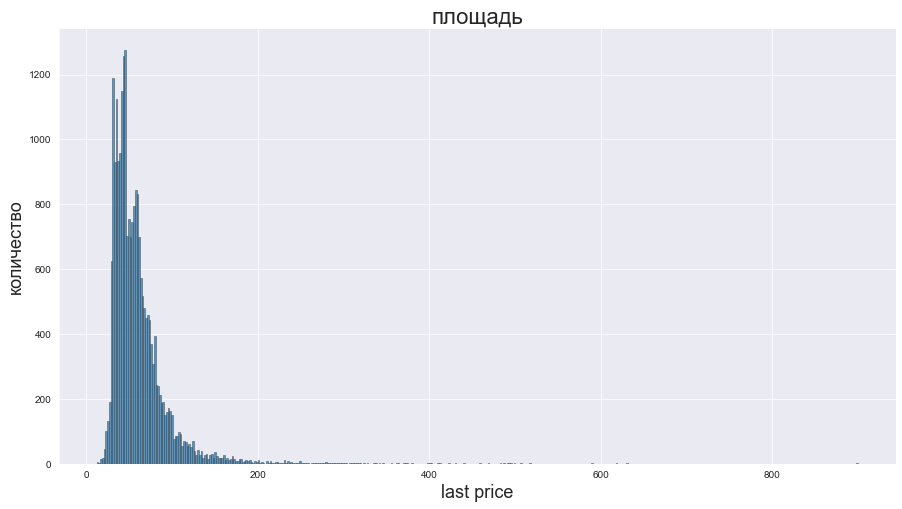

In [117]:
f, ax = plt.subplots(figsize=(15, 8))
sns.despine(f)
plt.title ('площадь', fontsize=22)
plt.xlabel('last price', fontsize=18)
plt.ylabel('количество', fontsize=18)
sns.histplot(
    real_estate_data['total_area'],
    edgecolor=".3",
    linewidth=.5,
    log_scale=(False, False),
)


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Вы еще не проходили подписи осей, молодец, что разобрался!

<hr>

#### 📊 цена

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
763000000
4650000.0


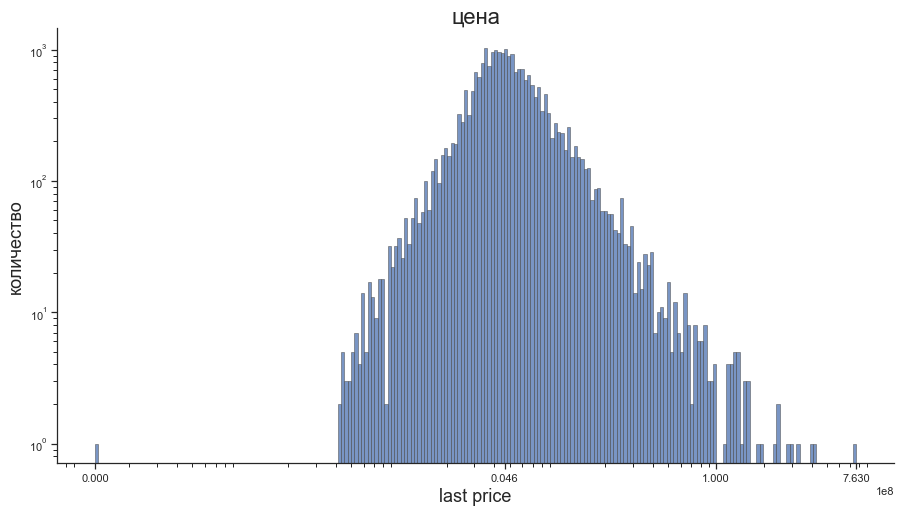

In [118]:
import matplotlib as mpl

sns.set_theme(style="ticks")

print(
    real_estate_data['last_price'].describe()
)
print(
    real_estate_data['last_price'].max()
)

print(
    real_estate_data['last_price'].median()
)

f, ax = plt.subplots(figsize=(15, 8))
sns.despine(f)
plt.title ('цена', fontsize=22)
plt.xlabel('last price', fontsize=18)
plt.ylabel('количество', fontsize=18)
sns.histplot(
    real_estate_data['last_price'] / 1_000_000),
    edgecolor=".3",
    linewidth=.5,
    log_scale=(True, True),
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.01219, 4.65, 100, 763])

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Простой способ избавить от е-формата чисел при анализе данного столбца - перевести значения в колонке last_price из руб в млн руб. Для этого значения в колонке last_price нужно разделить на 1 000 000.

<div class="alert alert-info"> <b>Комментарий студента:</b> О, класс, а то так и не нашёл параметр, которым можно отрегулировать отображение чисел.</div>

<hr>

#### 📊 число комнат

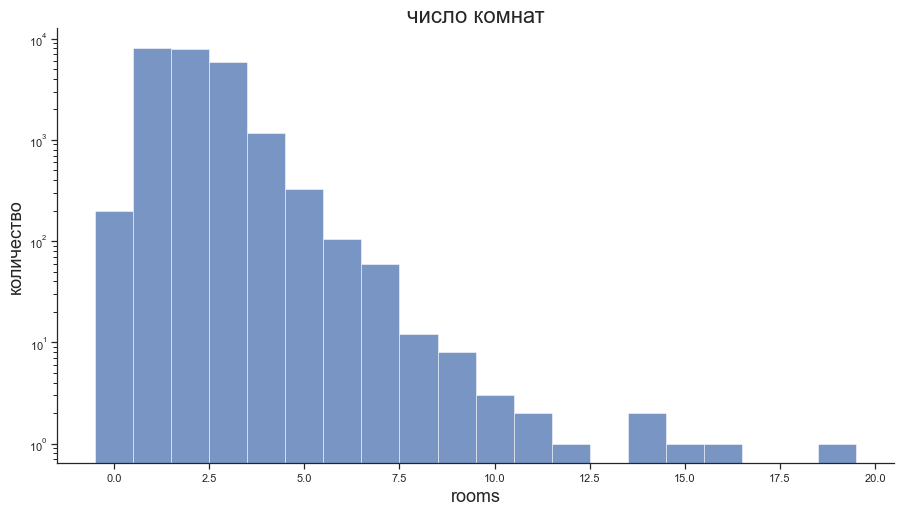

In [119]:
f, ax = plt.subplots(figsize=(15, 8))
sns.despine(f)
plt.title ('число комнат', fontsize=22)
plt.xlabel('rooms', fontsize=18)
plt.ylabel('количество', fontsize=18)
sns.histplot(
    real_estate_data['rooms'],
    discrete='True',
    linewidth=.5,
    log_scale=(False, True),
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

<hr>

#### 📊 высота потолков

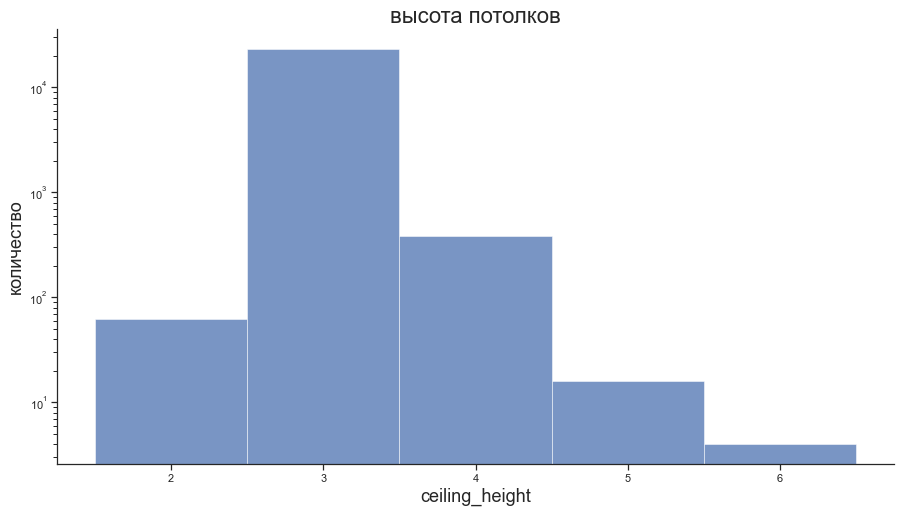

In [120]:
f, ax = plt.subplots(figsize=(15, 8))
sns.despine(f)
plt.title ('высота потолков', fontsize=22)
plt.xlabel('ceiling_height', fontsize=18)
plt.ylabel('количество', fontsize=18)
sns.histplot(
    real_estate_data['ceiling_height'],
    bins=15,
    binwidth=0.25,
    # edgecolor=".3",
    discrete='True',
    linewidth=.5,
    log_scale=(False, True),
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

<hr>

### Время продажи квартиры.

#### 📊 Построим гистограмму

<AxesSubplot:title={'center':'barplot'}, xlabel='days_exposition'>

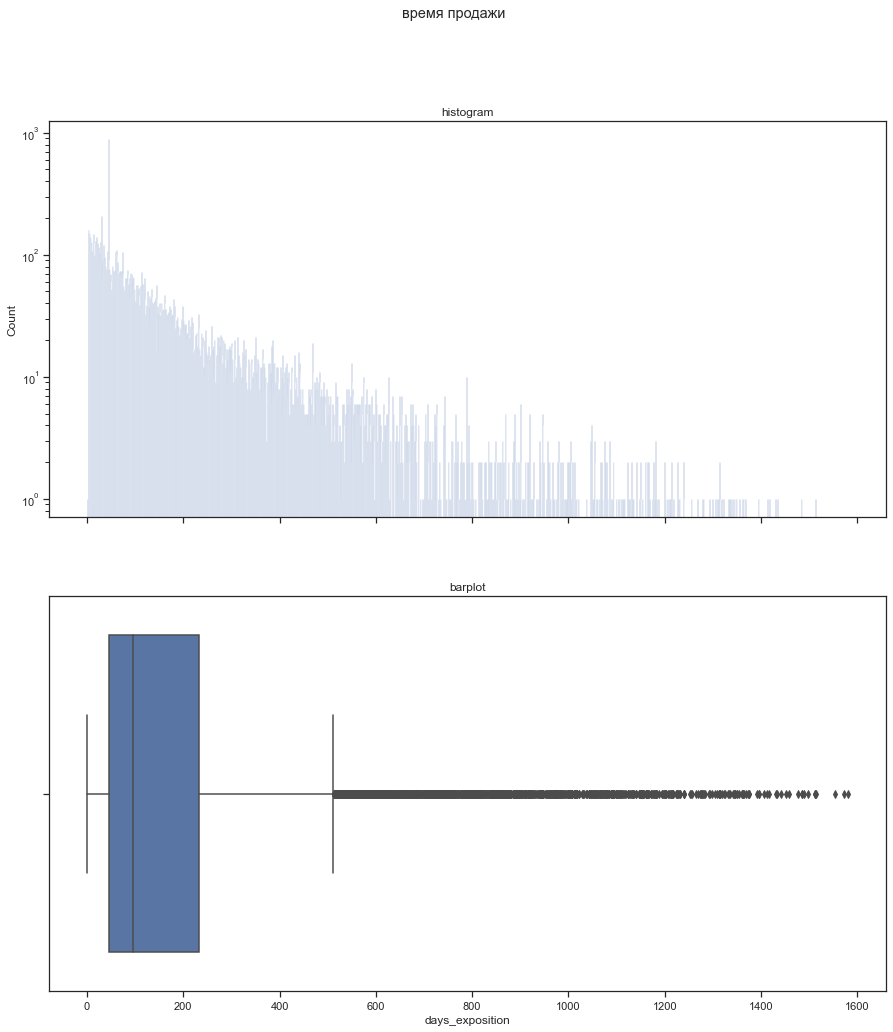

In [121]:
to_plot = real_estate_data.loc[
    real_estate_data['days_exposition'] != 0
    , 'days_exposition'
]

f, ax = plt.subplots(nrows=2, sharex=True, figsize=(15, 16))
f.suptitle('время продажи')
ax[0].set_title('histogram')
sns.histplot(
    data=to_plot,
    ax=ax[0],
    bins=15,
    binwidth=0.25,
    # edgecolor=".3",
    discrete='True',
    linewidth=.5,
    log_scale=(False, True)
)
ax[1].set_title('barplot')
sns.boxplot(
    x=to_plot,
    ax=ax[1],
    orient=1
)

#### Посчитаем среднее и медиану

In [156]:
real_estate_data.loc[
    real_estate_data['days_exposition'] != 0
    , 'days_exposition'
].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Молодец, что убираешь нули, прежде чем смотреть на данные. Они бы исказили результаты

#### Сколько обычно занимает продажа

Обычно **95** дней до снятия объявления

#### Когда продажи прошли очень быстро, а когда необычно долго?

меньше **45** дней — быстрее обычного
больше **232** дней — медленнее обычного

### Факторы, которые больше всего влияют на стоимость квартиры

#### 🔎 Зависит ли цена от площади

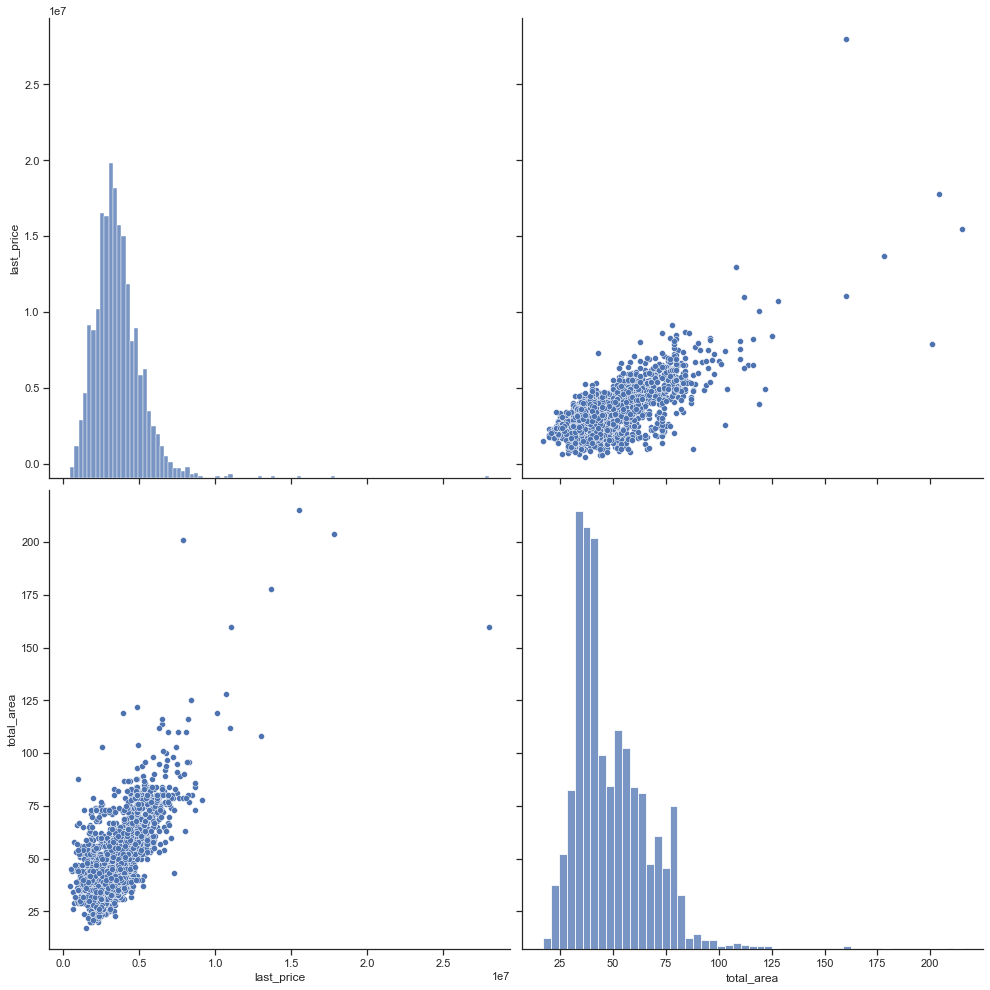

In [123]:
sns.pairplot(data=real_estate_data.loc[
                    real_estate_data['locality_type'] == 1
                    , ['last_price', 'total_area']
                ],
             height=7,
             aspect=1,
             )

#### 🔎 Зависит ли цена от числа комнат

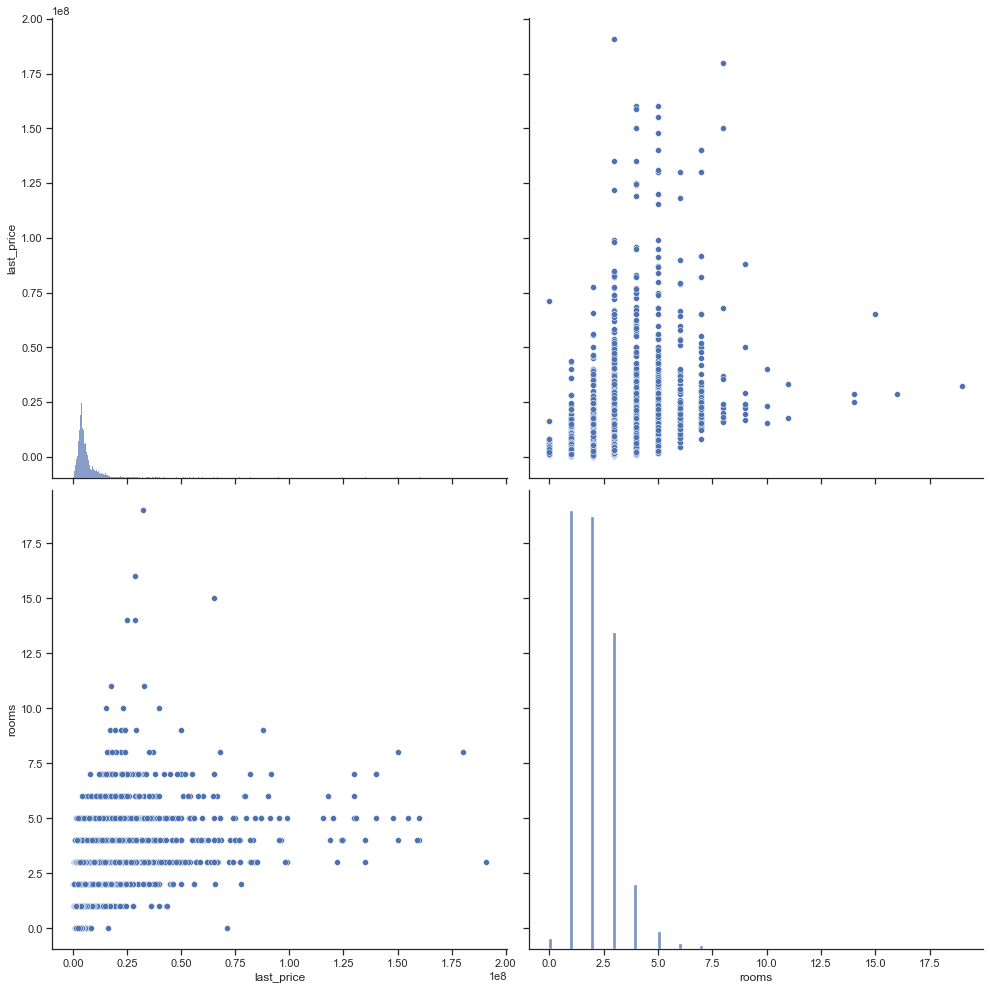

In [124]:
sns.pairplot(data=real_estate_data.loc[
                    # :
                    (real_estate_data['last_price']
                        <= 200_000_000
                    )
                   #  & (real_estate_data['last_price']
                   #     <= real_estate_data['last_price']
                   #     .describe()['75%']
                   # )
                    , ['last_price', 'rooms']
                  ],
            height=7,
            aspect=1,
         )

В целом видно что зависимость цены от числа комнат есть, но разброс цен очень большой для каждого количества комнат. Логика подсказывает что местоположение вносит эти «шумы».

#### 🔎 Зависит ли цена от удалённости от центра

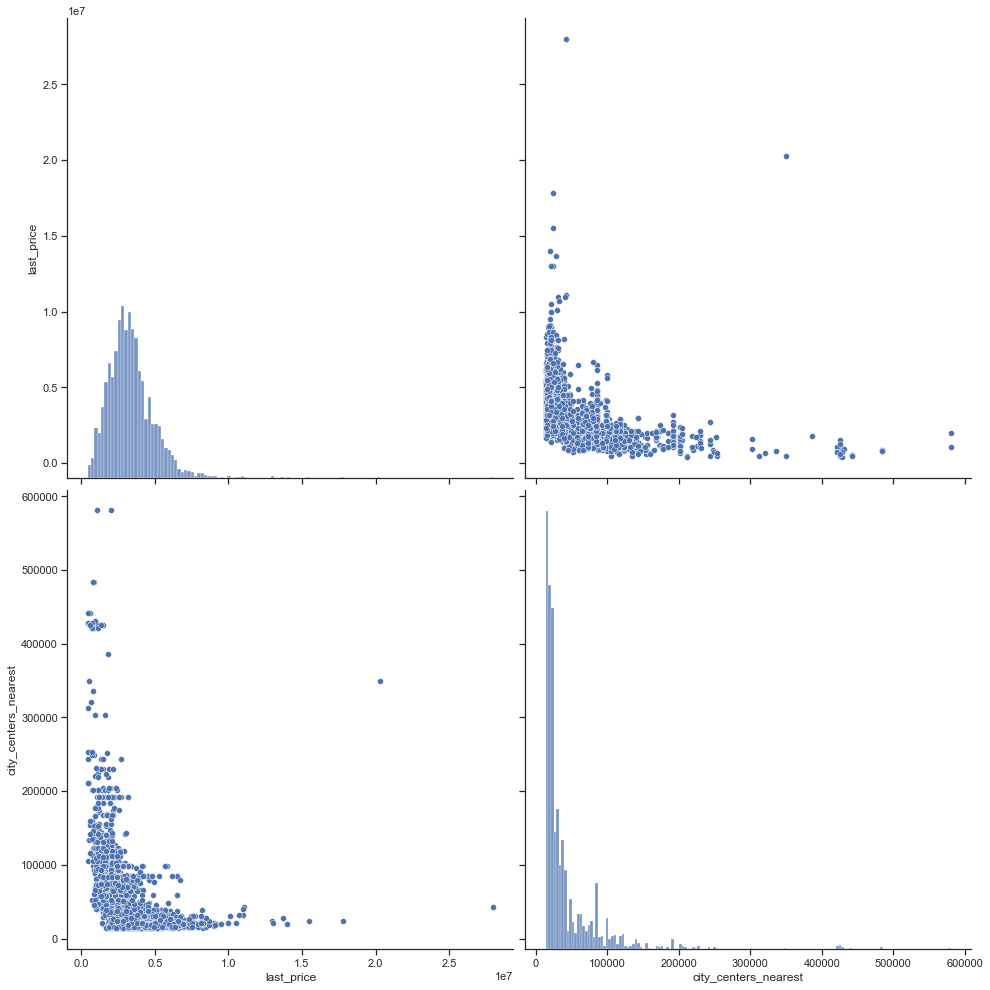

In [125]:
sns.pairplot(data=real_estate_data.loc[
    real_estate_data['locality_type'] != 0
    , ['last_price', 'city_centers_nearest']
],
             height=7,
             aspect=1,
             )

Очень похоже на обратную корреляцию ну и по логике оно так. Но хорошо бы сравнивать зависимость цены от удалённости при прочих равных: площадь, количество комнат, высота потолков.

#### 🔎 Зависит ли цена от этажа квартиры: первый, последний или другой

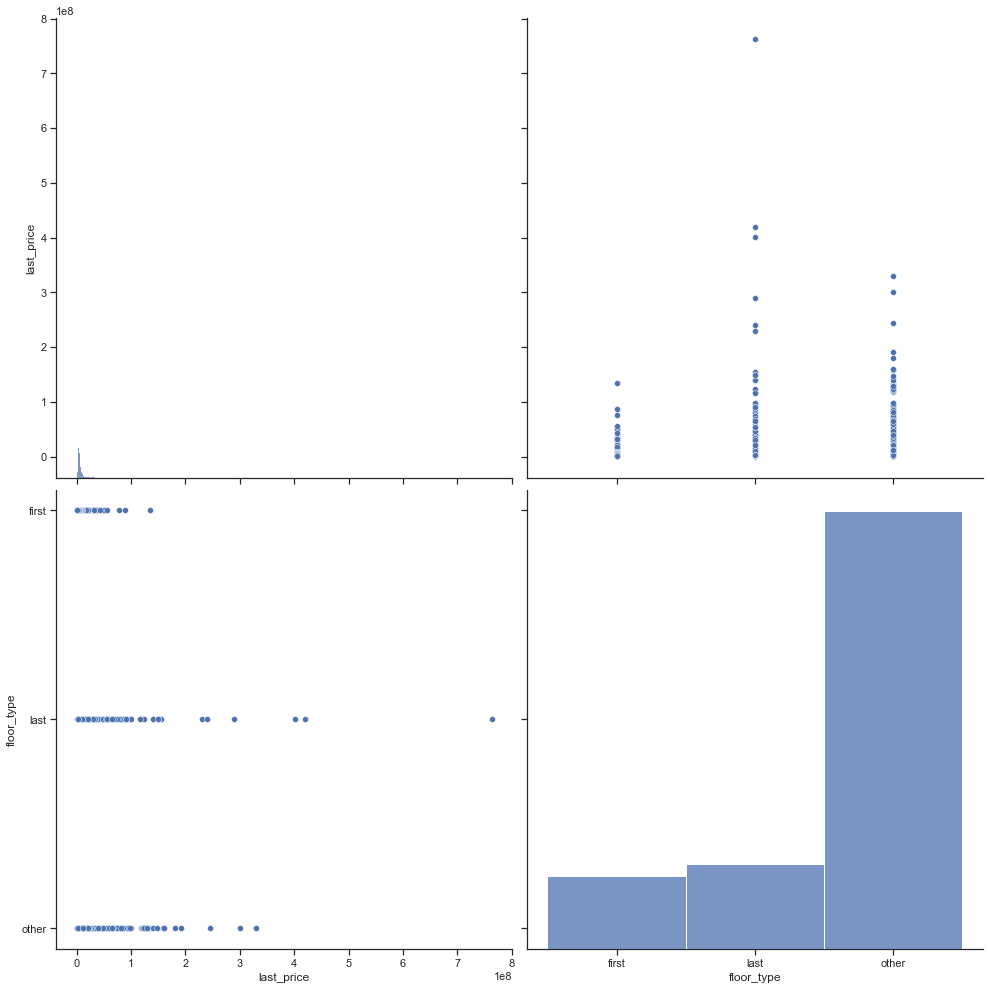

In [126]:
# to_plot = pd.DataFrame(real_estate_data.loc[: , ['last_price', 'floor_type']])

sns.pairplot(data=real_estate_data,
    vars=['last_price', 'floor_type'],

        # , ['last_price', 'floor_type']
    height=7,
    aspect=1,
)



Трудно сказать о зависимости цены от этажа, но видно что цена за `последние` этажы может быть выше чем за `другие` и `первые` этажи. Считаю, что нужно сравнивать при прочих равных…

#### 🔎 Зависит ли цена от даты размещения: дня недели, месяца и года

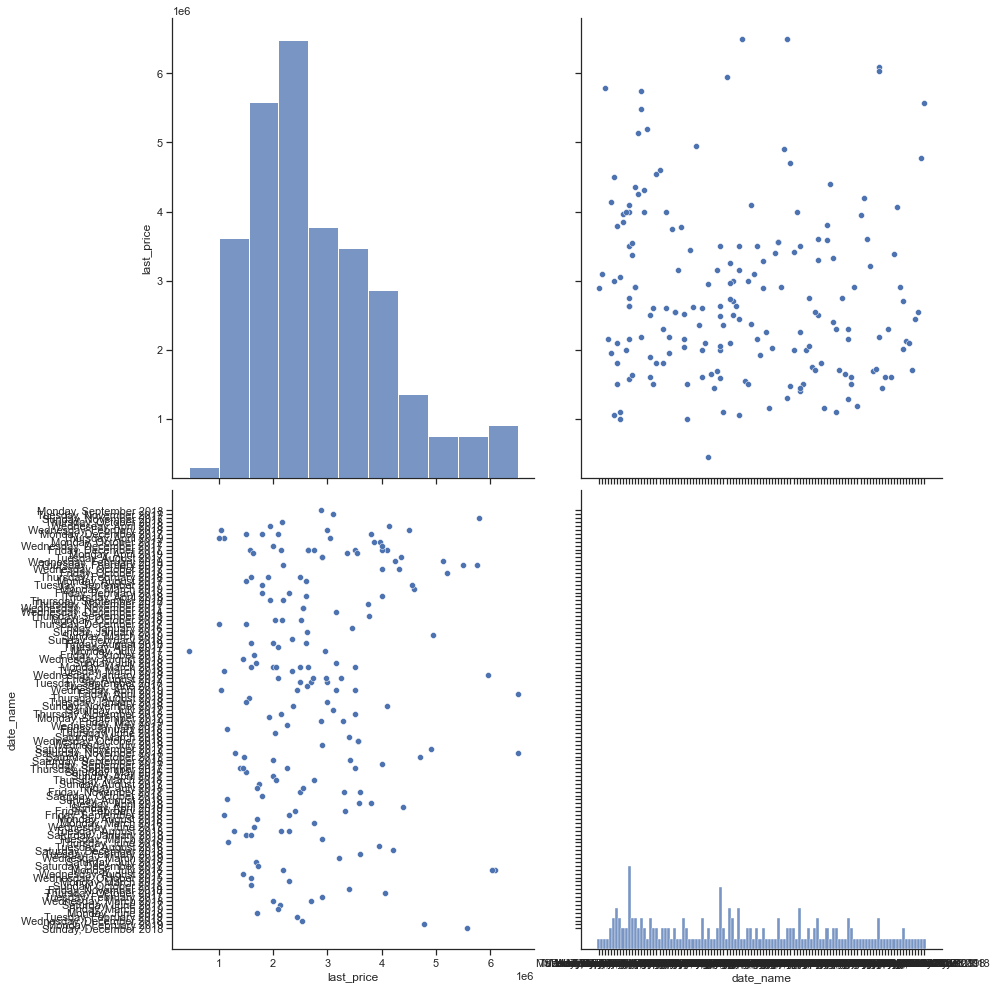

In [127]:
# to_plot = pd.DataFrame(real_estate_data.loc[: , ['last_price', 'floor_type']])

sns.pairplot(data=real_estate_data.loc[
            real_estate_data['locality_type'] == 2
        ],
    vars=['last_price', 'date_name'],

        # , ['last_price', 'floor_type']
    height=7,
    aspect=1,
)
# real_estate_data['first_day_exposition'].dt.strftime('%A, %B %Y')


Похоже, что не зависит цена от даты публикации

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Зависимость лучше всего показывает корреляция Пирсона. Будь внимателен, на параметрах 'last_price',  'total_area', 'rooms', 'cityCenters_nearest'коэффициент корреляции Пирсона работает хорошо. Но применение его к остальным параметрам - типу этажа, дню недели, году, и месяцу - не эффективно, т.к. цена квартиры зависит от них не линейно. Остальные параметры можно рассмотреть на обычных диаграммах, к примеру, столбчатых или линейных, сгруппировав данные по нужным параметрам и рассмотрев среднее цены.
    
    
    
Давай еще немного поработаем с корреляцией. Более наглядно можно было бы сделать следующим образом:
    
1) построить корреляцию матрицей для нужных параметров
 
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
    
2) интерпретировать получившийся коэффициент
    
3) для визуализации параметров использовать простой и полезный метод sns.pairplot - он отобразит корреляцию всех графиков компактным "полотном"
    
4) для остальных параметров построим обычные графики
    
</div>

<hr>

### 10 населённых пунктов с наибольшим числом объявлений

#### 🧮 Средняя цена квадратного метра в TOP 10 населённых пунктах

In [128]:
top_ten = pd.DataFrame(
    real_estate_data.groupby(by='locality_name')['last_price']
        .count()
        .sort_values(ascending=False)
        .head(10)
)

top_ten.reset_index(inplace=True)
top_ten.rename(columns = {'last_price':'advert_count'}, inplace=True)

top_ten['median_price'] = top_ten['locality_name'].apply(
    lambda nm: real_estate_data.loc[
        real_estate_data['locality_name'] == nm
        , 'last_price'
    ].median()
)

display(top_ten.sort_values(by='median_price', ascending=False))


,locality_name,advert_count,median_price
0,Санкт-Петербург,15770,5500000.0
5,Пушкин,369,5180000.0
7,Парголово,327,4100000.0
3,Шушары,440,3950000.0
2,Кудрово,472,3890000.0
6,Колпино,338,3600000.0
4,Всеволожск,398,3450000.0
1,Мурино,590,3400000.0
8,Гатчина,307,3100000.0
9,Выборг,237,2897000.0


#### 🧮 Населённые пункты с самой высокой и низкой стоимостью жилья

Если выбирать из **10 самых популярных** населённых пунктов, то:

Санкт-Петербург → самая высокая медианная стоимость.

Выборг → самая низкая медианная стоимость.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Корректно

<hr>

### Квартиры в Санкт-Петербурге

#### 🔎 Какая область входит в центр

#### ➕ Столбец с расстоянием до центра в километрах

In [129]:
spb_center = pd.DataFrame(
    real_estate_data.loc[
        real_estate_data['locality_name'] == 'Санкт-Петербург'
        ,['last_price', 'city_centers_nearest']
    ]
)

spb_center.reset_index(drop=True, inplace=True)

spb_center['city_centers_nearest'] = spb_center['city_centers_nearest'].apply(
    lambda mtr: round(mtr / 1000)
)

display(spb_center)

,last_price,city_centers_nearest
0,13000000,16
1,5196000,14
2,64900000,7
3,10000000,8
4,7915000,12
...,...,...
15765,3550000,16
15766,5500000,6
15767,9470000,4
15768,9700000,4


#### 🧮 Определим менианную цену для каждого километра

,km_to_center,last_price
0,0,17900000.0
1,1,11490000.0
2,2,10000000.0
3,3,8409000.0
4,4,9200000.0
5,5,9490000.0
6,6,8900000.0
7,7,7800000.0
8,8,7440000.0
9,9,5300000.0


<AxesSubplot:xlabel='km_to_center', ylabel='last_price'>

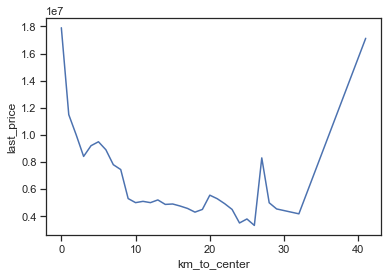

In [130]:
spb_price_for_km = pd.DataFrame(
    spb_center.groupby(by='city_centers_nearest')
    ['last_price']
    .median()
)

spb_price_for_km.reset_index(inplace=True)
spb_price_for_km.rename(columns = {'city_centers_nearest':'km_to_center'}, inplace=True)

display(
    spb_price_for_km
)

sns.lineplot(x="km_to_center", y="last_price",
             data=spb_price_for_km)

#### 📊 Как цена зависит от удалённости от центра

На графике ↑ видно, что до 25–ти км цена снижается при удалении от центра, а вот дальше начинает увеличиваться, но как–то не очень равномерно. Выбросы…?

#### 🔎 Определим границу, где график сильно меняется, — это и будет центральная зона

На 8-ом км медианная цена меняется с 5,3 млн ₽ до 7,44 млн ₽. Похоже, что это граница «центра».

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Удачное выделение центра

<hr>

### Выделим сегмент квартир в центре Петербурга

<AxesSubplot:title={'center':'ceiling_height'}, xlabel='ceiling_height', ylabel='Count'>

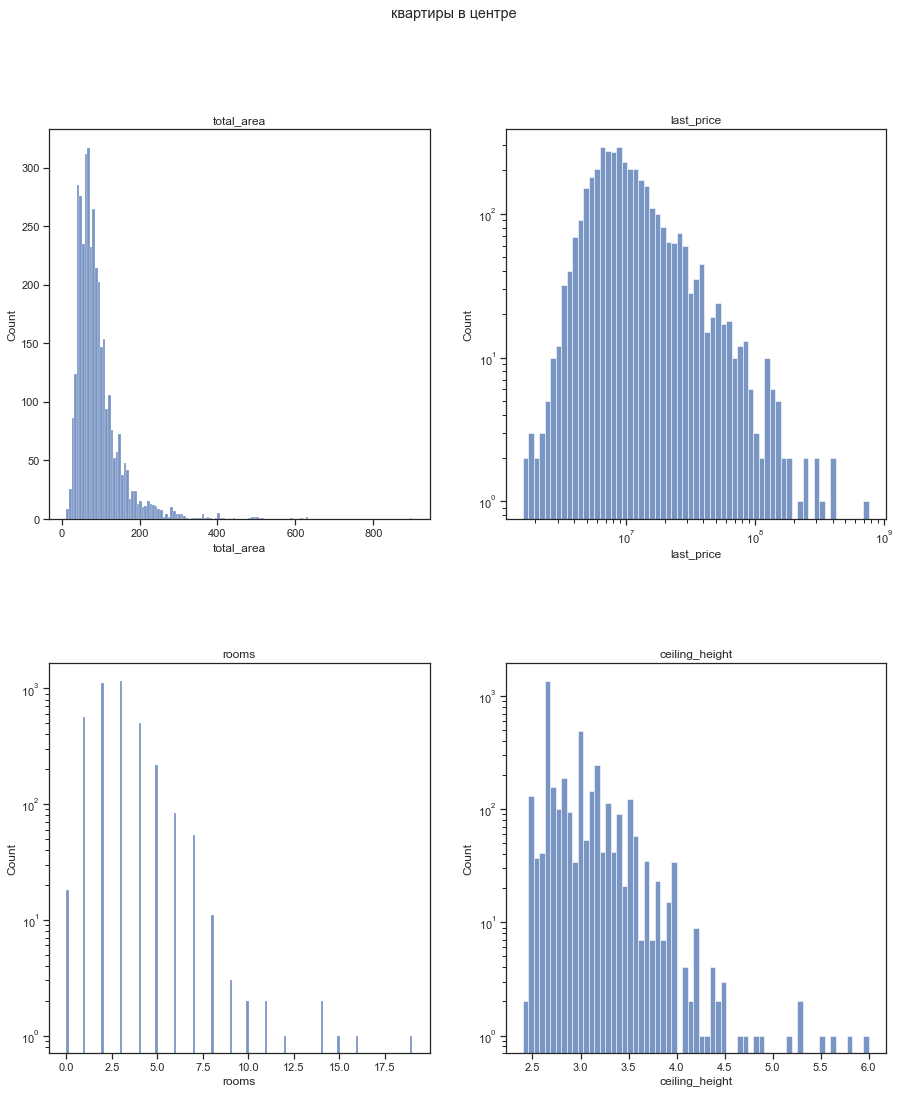

In [131]:
to_plot = (
    real_estate_data.loc[
        (real_estate_data['locality_name'] == 'Санкт-Петербург')
        & (real_estate_data['city_centers_nearest'] <= 8000)
        , ['total_area',
           'last_price',
           'rooms',
           'ceiling_height',
           'floor',
           'city_centers_nearest',
           'first_day_exposition'
        ]
    ]
)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 17), gridspec_kw={'hspace': 0.37, })
f.suptitle('квартиры в центре')

ax[0, 0].set_title('total_area')
sns.histplot(
    data=to_plot['total_area'],
    ax=ax[0, 0],
)
ax[0, 1].set_title('last_price')
sns.histplot(
    data=to_plot['last_price'],
    ax=ax[0, 1],
    log_scale=(True, True),
)
ax[1, 0].set_title('rooms')
sns.histplot(
    data=to_plot['rooms'],
    ax=ax[1, 0],
    log_scale=(False, True)
)
ax[1, 1].set_title('ceiling_height')
sns.histplot(
    data=to_plot['ceiling_height'],
    ax=ax[1, 1],
    log_scale=(False, True)
)

<hr>

<AxesSubplot:title={'center':'ceiling_height'}, xlabel='ceiling_height', ylabel='Count'>

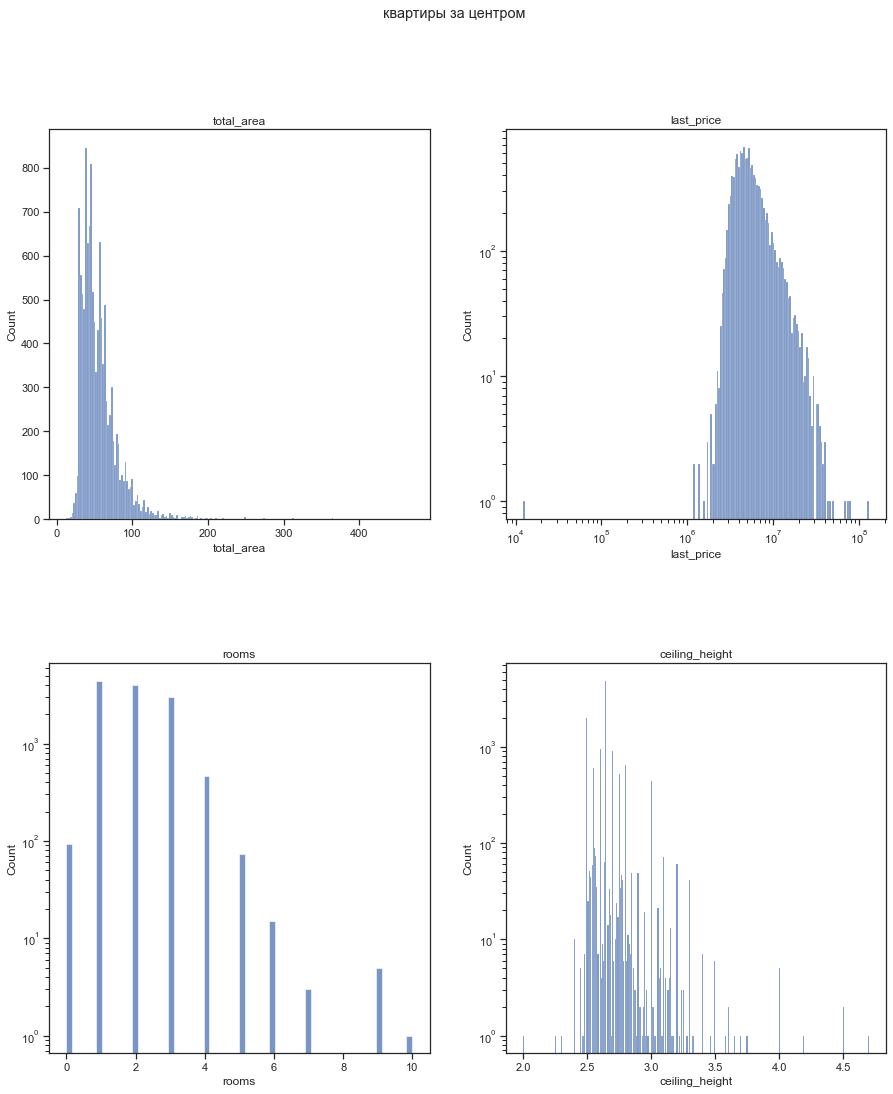

In [141]:
to_comparison = (
    real_estate_data.loc[
        (real_estate_data['locality_name'] == 'Санкт-Петербург')
        & (real_estate_data['city_centers_nearest'] > 8000)
        , ['total_area',
           'last_price',
           'rooms',
           'ceiling_height',
           'floor',
           'city_centers_nearest',
           'first_day_exposition'
           ]
    ]
)

f, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 17), gridspec_kw={'hspace': 0.37, })
f.suptitle('квартиры за центром')

ax[0, 0].set_title('total_area')
sns.histplot(
    data=to_comparison['total_area'],
    ax=ax[0, 0],
)
ax[0, 1].set_title('last_price')
sns.histplot(
    data=to_comparison['last_price'],
    ax=ax[0, 1],
    log_scale=(True, True),
)
ax[1, 0].set_title('rooms')
sns.histplot(
    data=to_comparison['rooms'],
    ax=ax[1, 0],
    log_scale=(False, True)
)
ax[1, 1].set_title('ceiling_height')
sns.histplot(
    data=to_comparison['ceiling_height'],
    ax=ax[1, 1],
    log_scale=(False, True)
)

#### 🔎 🎯 Площадь

In [147]:
print('квартиры в центре Петербурга\n',
    to_plot['total_area'].describe()
)
print('\nостальные квартиры\n',
    to_comparison['total_area'].describe()
)

квартиры в центре Петербурга
 count    3728.000000
mean       92.080472
std        60.451112
min        12.000000
25%        56.000000
50%        77.000000
75%       108.000000
max       900.000000
Name: total_area, dtype: float64

остальные квартиры
 count    12042.000000
mean        56.011460
std         26.442458
min         13.000000
25%         39.000000
50%         50.000000
75%         65.000000
max        470.000000
Name: total_area, dtype: float64


У квартир в центре Петербурга медианная площадь больше 77 > 50 м²…

<hr>

#### 🔎 🎯 Цена

In [153]:
print('квартиры в центре Петербурга\n',
    to_plot['last_price'].describe()
)
print('\nостальные квартиры\n',
    to_comparison['last_price'].describe()
)

'квартиры в центре Петербурга'

count    3.728000e+03
mean     1.470808e+07
std      2.465597e+07
min      1.600000e+06
25%      6.550000e+06
50%      9.000000e+06
75%      1.410212e+07
max      7.630000e+08
Name: last_price, dtype: float64

'остальные квартиры'

count    1.204200e+04
mean     5.999789e+06
std      3.882693e+06
min      1.219000e+04
25%      3.990000e+06
50%      4.950000e+06
75%      6.650000e+06
max      1.300000e+08
Name: last_price, dtype: float64

У квартир в центре Петербурга медианная цена больше 9 млн > 4.95 млн…

<hr>

#### 🔎 🎯 Число комнат

In [154]:
print('квартиры в центре Петербурга\n',
      to_plot['rooms'].describe()
      )
print('\nостальные квартиры\n',
      to_comparison['rooms'].describe()
      )

квартиры в центре Петербурга
 count    3728.000000
mean        2.813841
std         1.454138
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

остальные квартиры
 count    12042.000000
mean         1.973426
std          0.950284
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: rooms, dtype: float64


У квартир в центре Петербурга медианная количество комнат больше 3 > 2 …

<hr>

#### 🔎 🎯 Высота потолков

In [155]:
print('квартиры в центре Петербурга\n',
      to_plot['ceiling_height'].describe()
      )
print('\nостальные квартиры\n',
      to_comparison['ceiling_height'].describe()
      )

квартиры в центре Петербурга
 count    3728.000000
mean        2.929688
std         0.369629
min         2.400391
25%         2.650391
50%         2.800781
75%         3.099609
max         6.000000
Name: ceiling_height, dtype: float64

остальные квартиры
 count    12042.000000
mean         2.660156
std          0.143921
min          2.000000
25%          2.599609
50%          2.650391
75%          2.699219
max          4.699219
Name: ceiling_height, dtype: float64


У квартир в центре Петербурга медианная высота потолка и диапазон значений больше 2.8 > 2.65 м …
да и максимальная высота больше)

<hr>

### Выделим факторы, которые влияют на стоимость квартиры в центре Петербурга

#### 🔎 число комнат

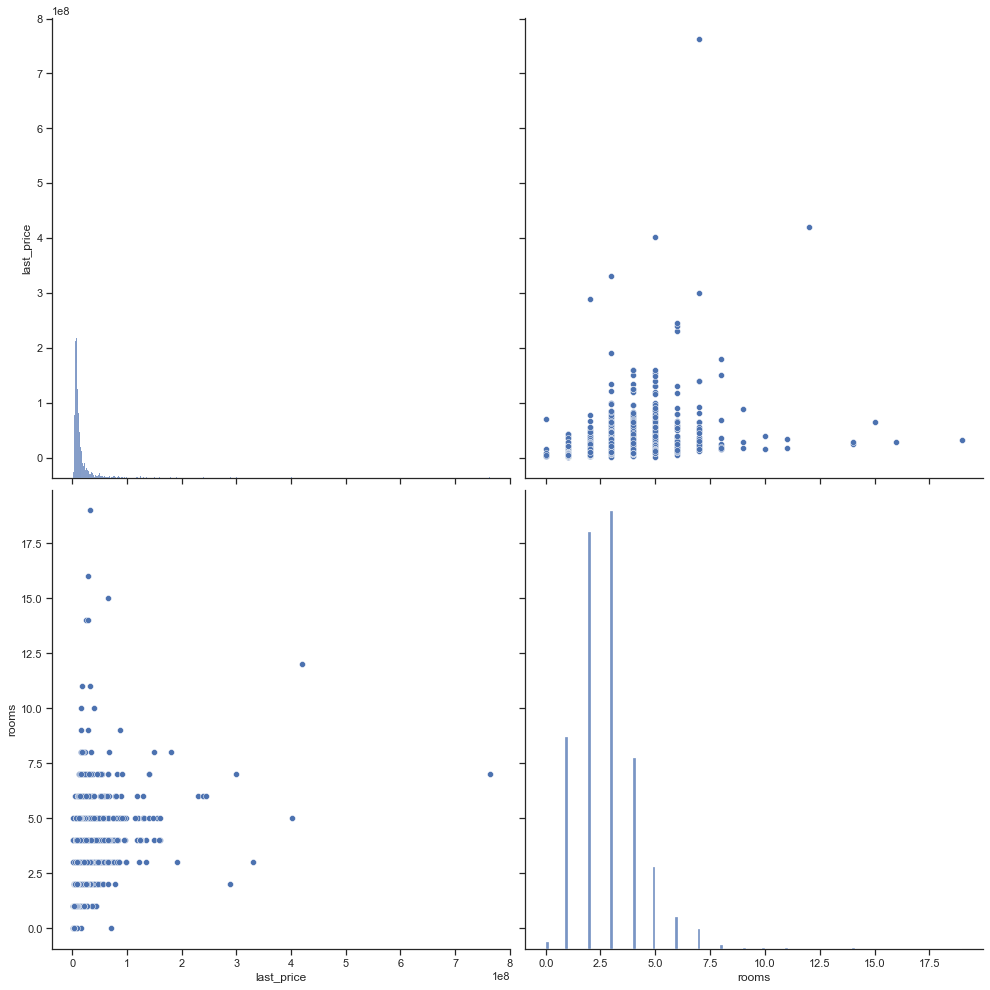

In [132]:
sns.pairplot(data=to_plot,
    vars=['last_price', 'rooms'],
    height=7,
    aspect=1,
)

Интересно, что высокая цена у 4–5 комнатных квартир. То есть от студий и однокомнатных цена растёт с ростом количества комнат. Пик цены у 4–5 комнатных, далее цена снижается с увеличением количества комнат. Видимо, коммуналки не очень ценятся)

#### 🔎 этаж

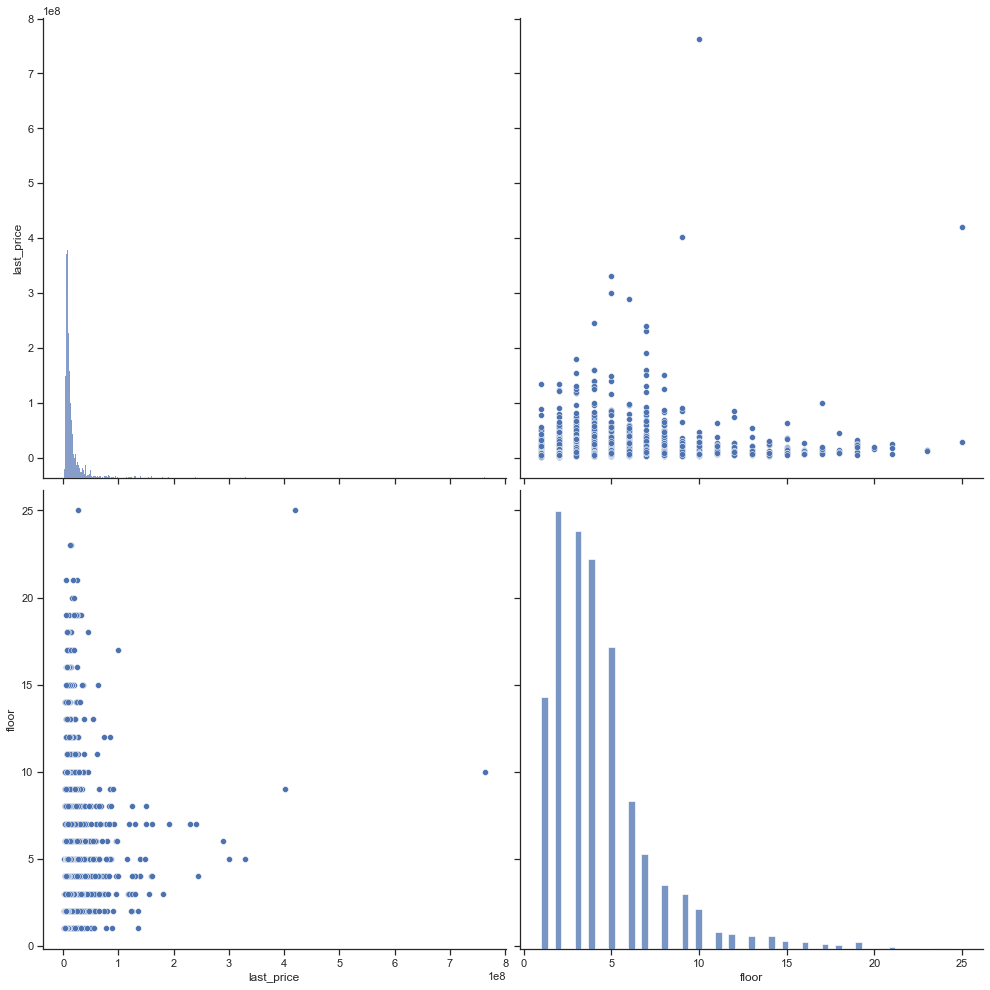

In [133]:
sns.pairplot(data=to_plot,
             vars=['last_price', 'floor'],
             height=7,
             aspect=1,
             )

#### 🔎 удалённость от центра

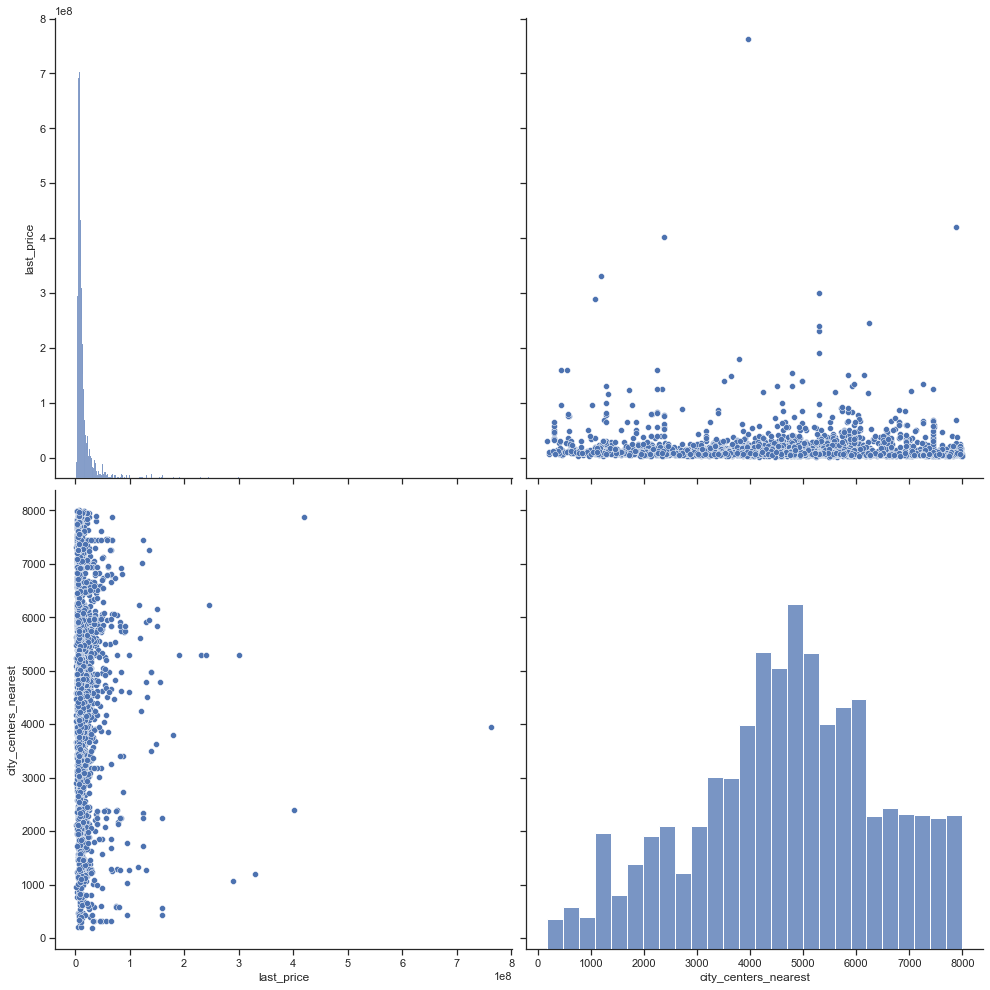

In [134]:
sns.pairplot(data=to_plot,
             vars=['last_price', 'city_centers_nearest'],
             height=7,
             aspect=1,
             )

Явной зависимости цены от удалённости от центра в центре города не видно. Оно и понятно, в центре так в центре. Эрмитаж, Аврора или Александро–Невская Лавра рядом уже не так важно: цена будет высокой)

#### 🔎 дата размещения объявления

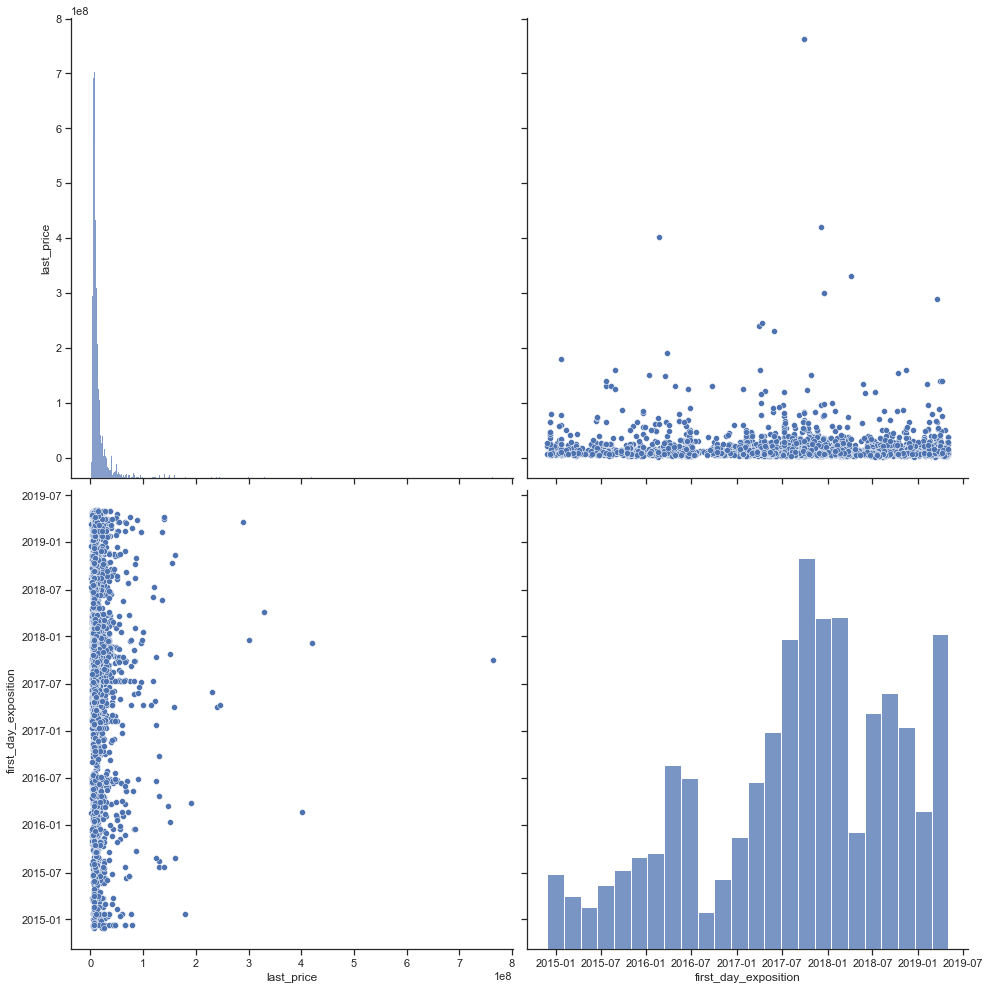

In [135]:
sns.pairplot(data=to_plot,
             vars=['last_price', 'first_day_exposition'],
             height=7,
             aspect=1,
             )

Не похоже, что дата размещения влияет на цену.

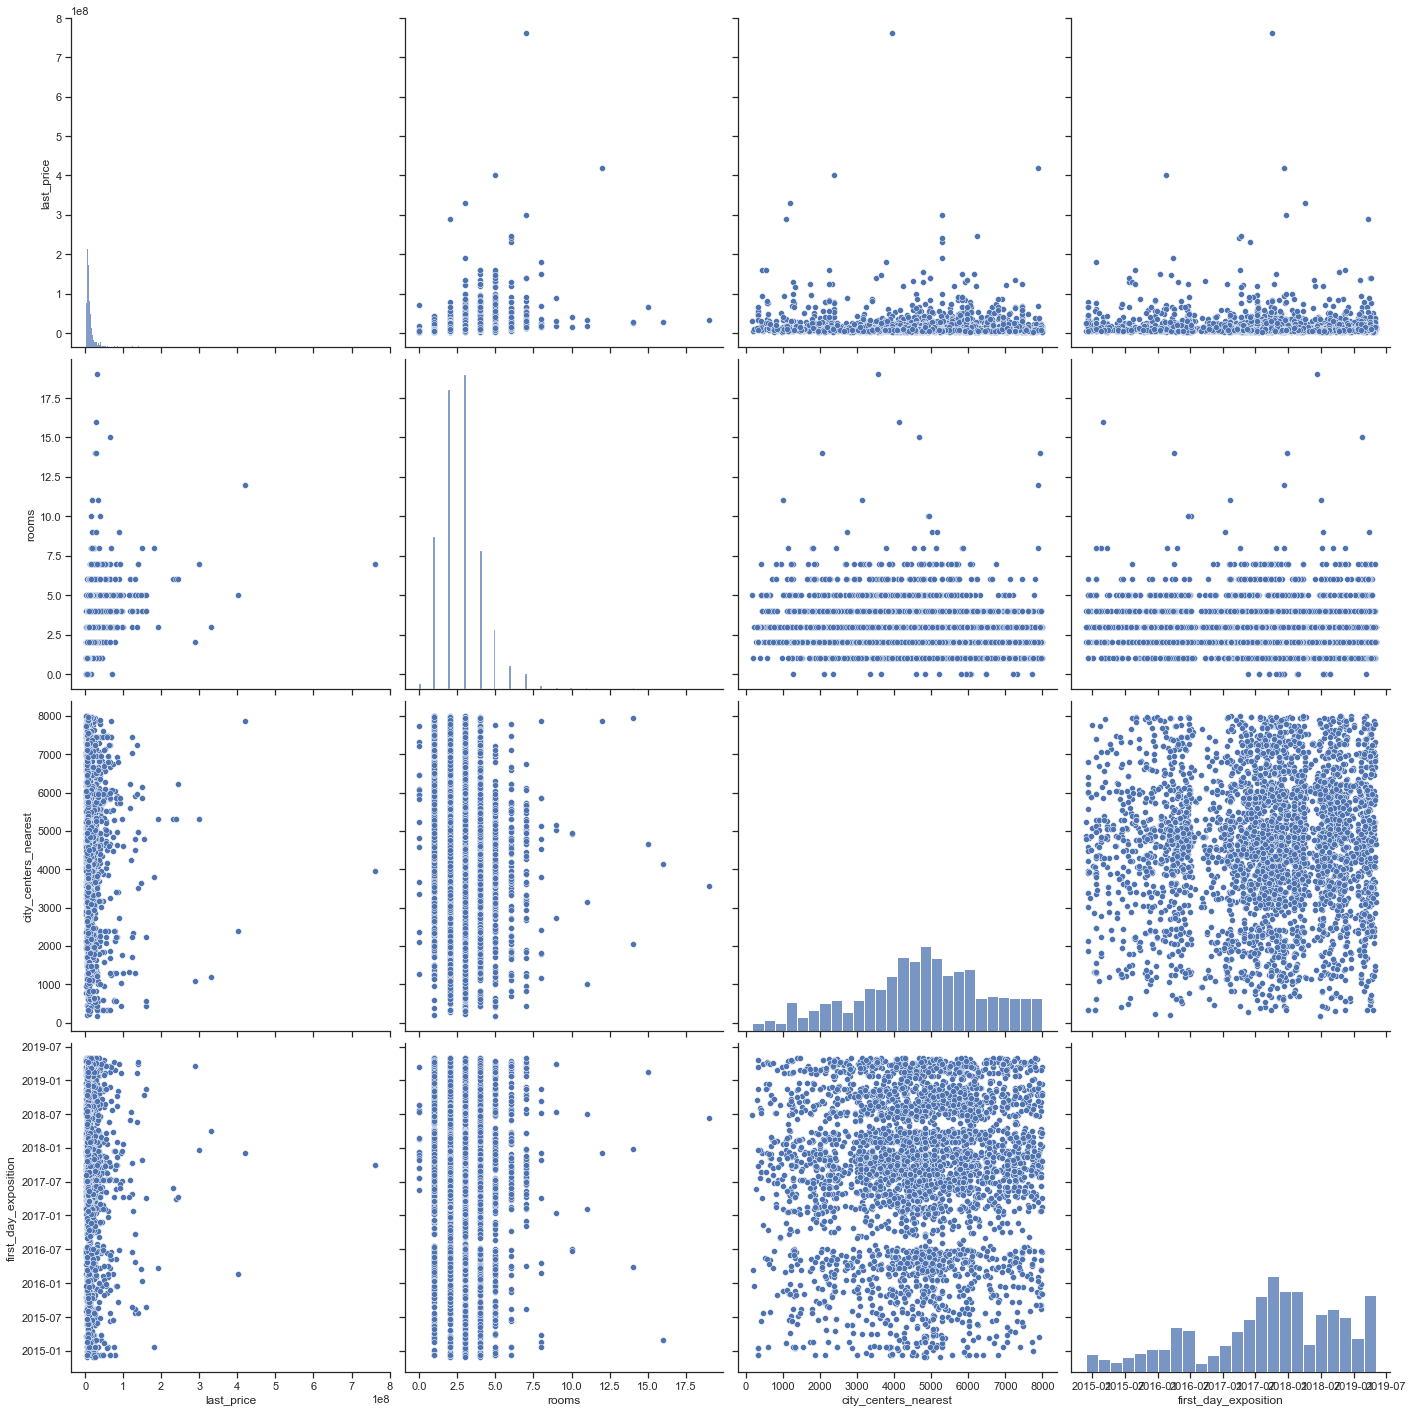

In [136]:
sns.pairplot(data=to_plot,
             vars=['last_price', 'rooms', 'city_centers_nearest', 'first_day_exposition'],
             height=5,
             aspect=1,
             )

Видно, что есть промежутки с малой активностью публикаций объавлений о квартирах в центре.

<hr>

Не похоже, что дата размещения влияет на цену.

Пропусков в данных много. В исходных данных, которые сформированы запросом к API yandex map могут быть пропуски, потомучто однозначно установить локацию невозможно. То есть по некоторым изначальным значениям столбца 'locality_name' API возвращает несколько вариантов. Нужно уточнять локацию более детально. Где+то NaN — это просто False или 0.  О причинах остальных пропусков трудно судить, каких+то явных закономерностей не заметил. Но видно что многие NaN группируются вместе) То есть NaN сразу во многих столбцах строки…

Видно, что есть промежутки с малой активностью публикаций объавлений о квартирах в центре.


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Здесь также можно расширить анализ и добавить корреляцию

## Шаг 5. Общий вывод

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Вывод - это полный отчет о проделанной работе. Он должен содержать все: от обработки данных до рекомендаций заказчику. Я бы советовала в начале кратко описывать, с какими данными мы работали и что сделали, а затем отвечать на вопрос исследования - в нашем случае, установить примерную рыночную стоимость для объектов,  исходя из влияния параметров (стоимость по районам и какие факторы на нее влияют)  - средняя стоимость в общей базе и средняя в центре. Давай напишем его

## Описание данных

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)

`balcony` — число балконов

`ceiling_height` — высота потолков (м)

`cityCenters_nearest` — расстояние до центра города (м)

`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

`first_day_exposition` — дата публикации

`floor` — этаж

`floors_total` — всего этажей в доме

`is_apartment` — апартаменты (булев тип)

`kitchen_area` — площадь кухни в квадратных метрах (м²)

`last_price` — цена на момент снятия с публикации

`living_area` — жилая площадь в квадратных метрах (м²)

`locality_name` — название населённого пункта

`open_plan` — свободная планировка (булев тип)

`parks_around3000` — число парков в радиусе 3 км

`parks_nearest` — расстояние до ближайшего парка (м)

`ponds_around3000` — число водоёмов в радиусе 3 км

`ponds_nearest` — расстояние до ближайшего водоёма (м)

`rooms` — число комнат

`studio` — квартира-студия (булев тип)

`total_area` — площадь квартиры в квадратных метрах (м²)

`total_images` — число фотографий квартиры в объявлении

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за проект! Видно, что ты старался и он получился очень сильным. Ты аккуратно работаешь с данными и выносишь качественные предположения - как настоящий аналитик. Давай сделаем его еще лучше: 
    
- немного поработаем с корреляцией (добавим ее в анализ для общей базы и центра Питера)
- напишем финальный вывод. 
    
Оставила направляющие комментарии. Возвращаю тебе работу, чтобы ты смог задать вопросы. Буду ждать твою работу на финальное ревью!
</div>